**GOOGLE PLAYSTORE EDA**

###### IMPORTING LIBRARIES|

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### LOADING THE DATASET

In [3]:
df = pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


- This dataset contains all the details of the apps on Google Play.

In [4]:
print("THE NUMBER OF ROWS AND COLUMNS: ",df.shape)
print("THE NUMBER OF ELEMENTS IN THE DATASET: ",df.size)

THE NUMBER OF ROWS AND COLUMNS:  (10841, 13)
THE NUMBER OF ELEMENTS IN THE DATASET:  140933


In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

    each feature represents:
        * App             - Name of the app
        * Category        - Category of the app(examples: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.)
        * Rating          - The current average rating (out of 5) of the app on Google Play
        * Reviews         - Number of user reviews given on the app
        * Size            - Size of the app in MB (megabytes)
        * Installs        - Number of times the app was downloaded from Google Play
        * Type            - Whether the app is paid or free
        * Price           - Price of the app in US$
        * Content Rating  - The target audience for the app, such as Everyone, Teen, Mature, etc.
        * Genres          - Additional categorization of the app based on its features or content
        * Last Updated    - Date on which the app was last updated on Google Play
        * Current Ver     - The current version of the app.
        * Android Ver     -  The minimum Android version required to run the app

###### DATA TYPES OF COLUMNS

In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

###### MISSING VALUES

In [7]:
# non-null values
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [8]:
# null values/missing values
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [9]:
# rating have more null values

###### VISUALIZING NULL VALUES

In [10]:
sns.set_theme() # sets the default Seaborn theme, which changes the aesthetics of the plots.
sns.set(rc={"figure.dpi":300,"figure.figsize":(12,9)})
# "figure.dpi": 300 sets the dots per inch (DPI) for the figure.
# "figure.figsize": (12, 9) sets the width and height of the figure in inches.

<Axes: >

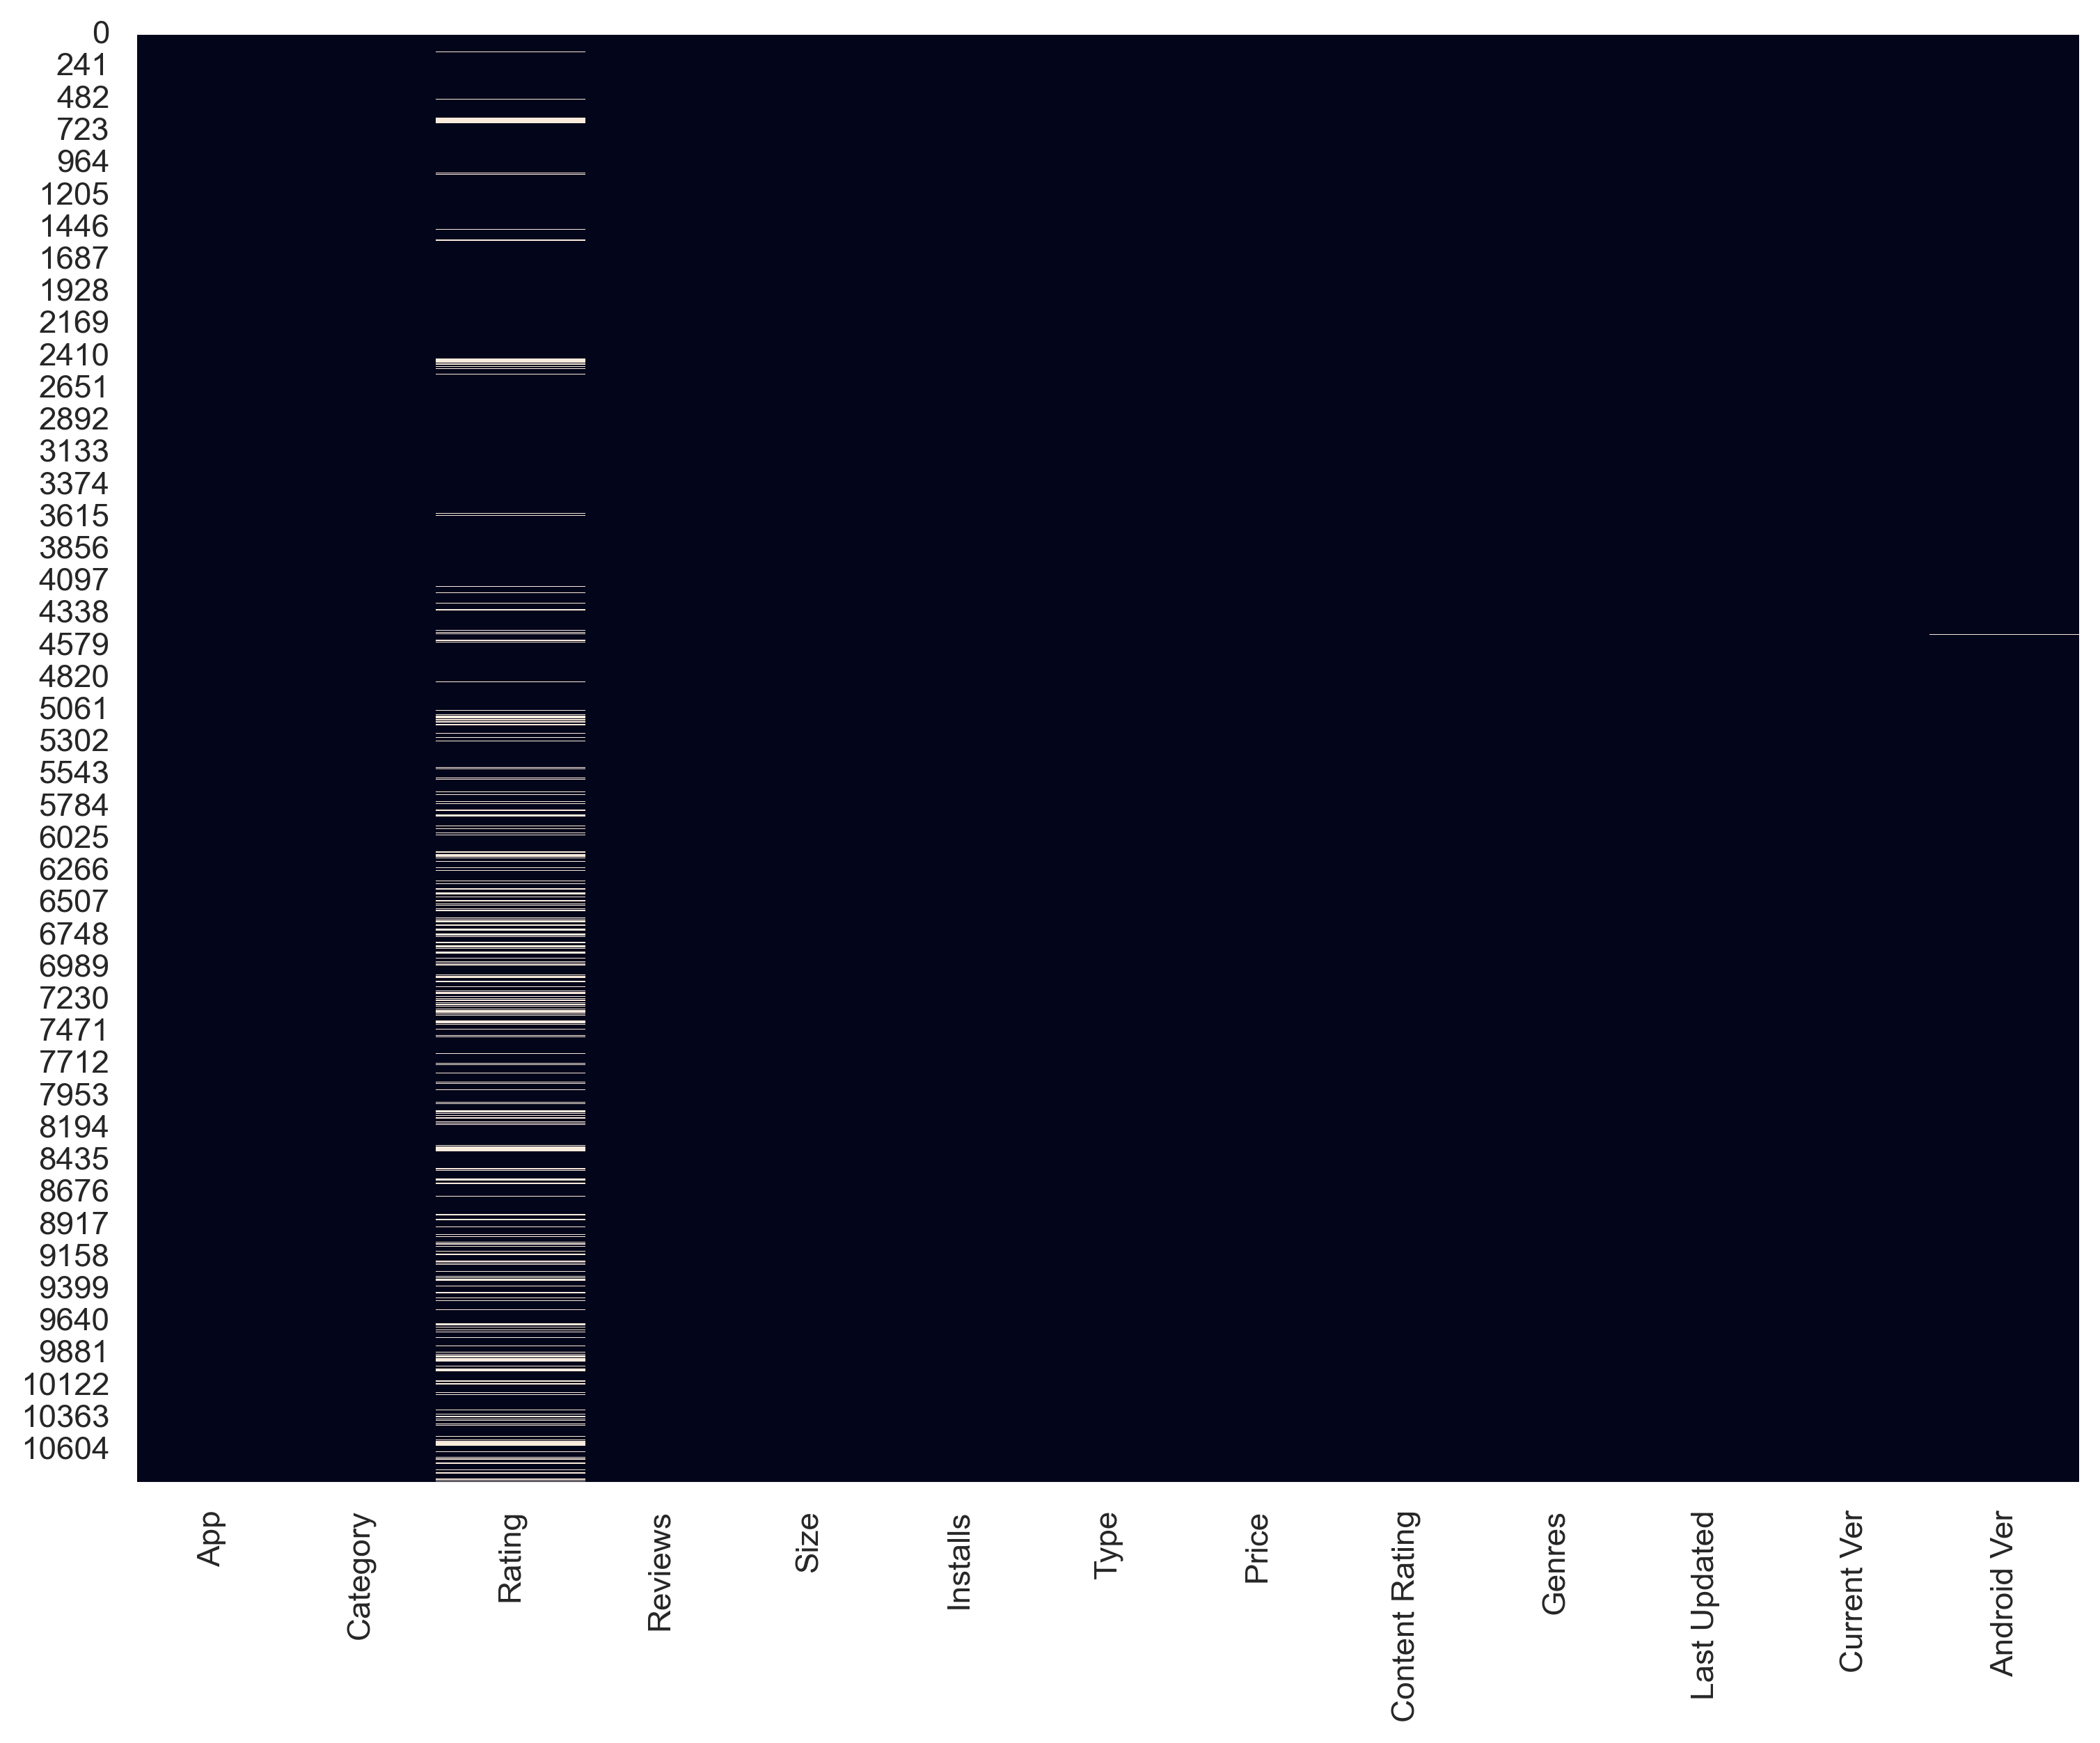

In [11]:
sns.heatmap(df.isnull(), cbar=False)

###### FILLING NULL VALUES IN RATING WITH MEDIAN

In [12]:
# median is more robust than the mean for the outlier values

In [13]:
rating_median = df["Rating"].median()
print(rating_median)
df["Rating"].fillna(rating_median, inplace=True)

4.3


In [14]:
rating_median = df["Rating"].median()
print(rating_median)

4.3


In [15]:
df["Rating"].fillna(rating_median,inplace=True)

remove the other missing data

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum().sum()

0

In [18]:
# now there is no any missing values

###### DATA PREPROCESSING

In [19]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [20]:
print("NUMBER OF UNIQUE VALUES IN EACH FEATURE: \n",df.nunique())

NUMBER OF UNIQUE VALUES IN EACH FEATURE: 
 App               9648
Category            33
Rating              39
Reviews           5999
Size               457
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1376
Current Ver       2831
Android Ver         33
dtype: int64


**FEATURE : "Reviews"**

In [23]:
df["Reviews"].describe()

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

- convert the type(object) of reviews into numeric

In [24]:
df["Reviews"] = df["Reviews"].astype("int64")


In [25]:
df["Reviews"].describe()

count    1.082900e+04
mean     4.446018e+05
std      2.929213e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.100000e+03
75%      5.481500e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [26]:
df["Reviews"].describe().round()

count       10829.0
mean       444602.0
std       2929213.0
min             0.0
25%            38.0
50%          2100.0
75%         54815.0
max      78158306.0
Name: Reviews, dtype: float64

**FEATURE: "Size"**

In [29]:
df["Size"].describe()

count                  10829
unique                   457
top       Varies with device
freq                    1694
Name: Size, dtype: object

In [30]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

- remove the M and k in the size column

In [32]:
df["Size"].replace("M","",regex=True,inplace=True)
df["Size"].replace("k","",regex=True,inplace=True)

In [33]:
df["Size"].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

In [34]:
# now "k" and "M" removed

- replace the string "Varies with device" with the median of the size column

In [35]:
size_median = df[df["Size"]!="Varies with device"]["Size"].astype(float).median()
size_median

15.0

In [36]:
df["Size"].replace("Varies with device",size_median,inplace=True)

- convert this column into numeric.

In [37]:
df["Size"] = pd.to_numeric(df["Size"])

In [38]:
df["Size"].sample(6)

4244    75.0
5333     6.7
6158     7.8
38      11.0
2044    33.0
2336    37.0
Name: Size, dtype: float64

In [40]:
df["Size"].describe()

count    10829.000000
mean        33.514212
std         90.973495
min          1.000000
25%          6.800000
50%         15.000000
75%         28.000000
max       1020.000000
Name: Size, dtype: float64

In [41]:
df["Size"].describe().round()

count    10829.0
mean        34.0
std         91.0
min          1.0
25%          7.0
50%         15.0
75%         28.0
max       1020.0
Name: Size, dtype: float64

**FEATURE: "Installs"**

In [43]:
df["Installs"].describe()

count          10829
unique            20
top       1,000,000+
freq            1578
Name: Installs, dtype: object

In [47]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

- avoid / remove + and , signs

In [48]:
df["Installs"] = df["Installs"].apply(lambda x:x.replace("+",""))
df["Installs"] = df["Installs"].apply(lambda x:x.replace(",",""))
df["Installs"] = df["Installs"].apply(lambda x:int(x))

In [49]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

**FEATURE: "Price"**

In [50]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

- remove the $ symbol in this column.

In [51]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))

In [52]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

**FEATURE: "Genres"**

In [53]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [58]:
df["Genres"].head(7)

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
Name: Genres, dtype: object

- data is divided between genre and subgenre, let's only set by genre

In [59]:
df["Genres"] = df["Genres"].str.split(";").str[0]

In [60]:
len(df["Genres"].unique())

48

In [61]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [62]:
df["Genres"].head(7)

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
5    Art & Design
6    Art & Design
Name: Genres, dtype: object

- combine the music & audio with the music.

In [63]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

In [64]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Video Players & Editors', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'News & Magazines',
       'Maps & Navigation', 'Casino'], dtype=object)

**FEATURE: "Last_Updated"**

In [69]:
df["Last Updated"].sample(7)

2084          July 4, 2018
4971    September 25, 2017
5425         June 28, 2018
9437     September 9, 2016
4034         July 12, 2018
4725          June 4, 2018
6258     November 19, 2015
Name: Last Updated, dtype: object

convert to datatime

In [70]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

In [72]:
# dtypes
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

###### DATA VISUALIZATION

**BAR PLOT and BOX PLOT**

which type of apps are more used?

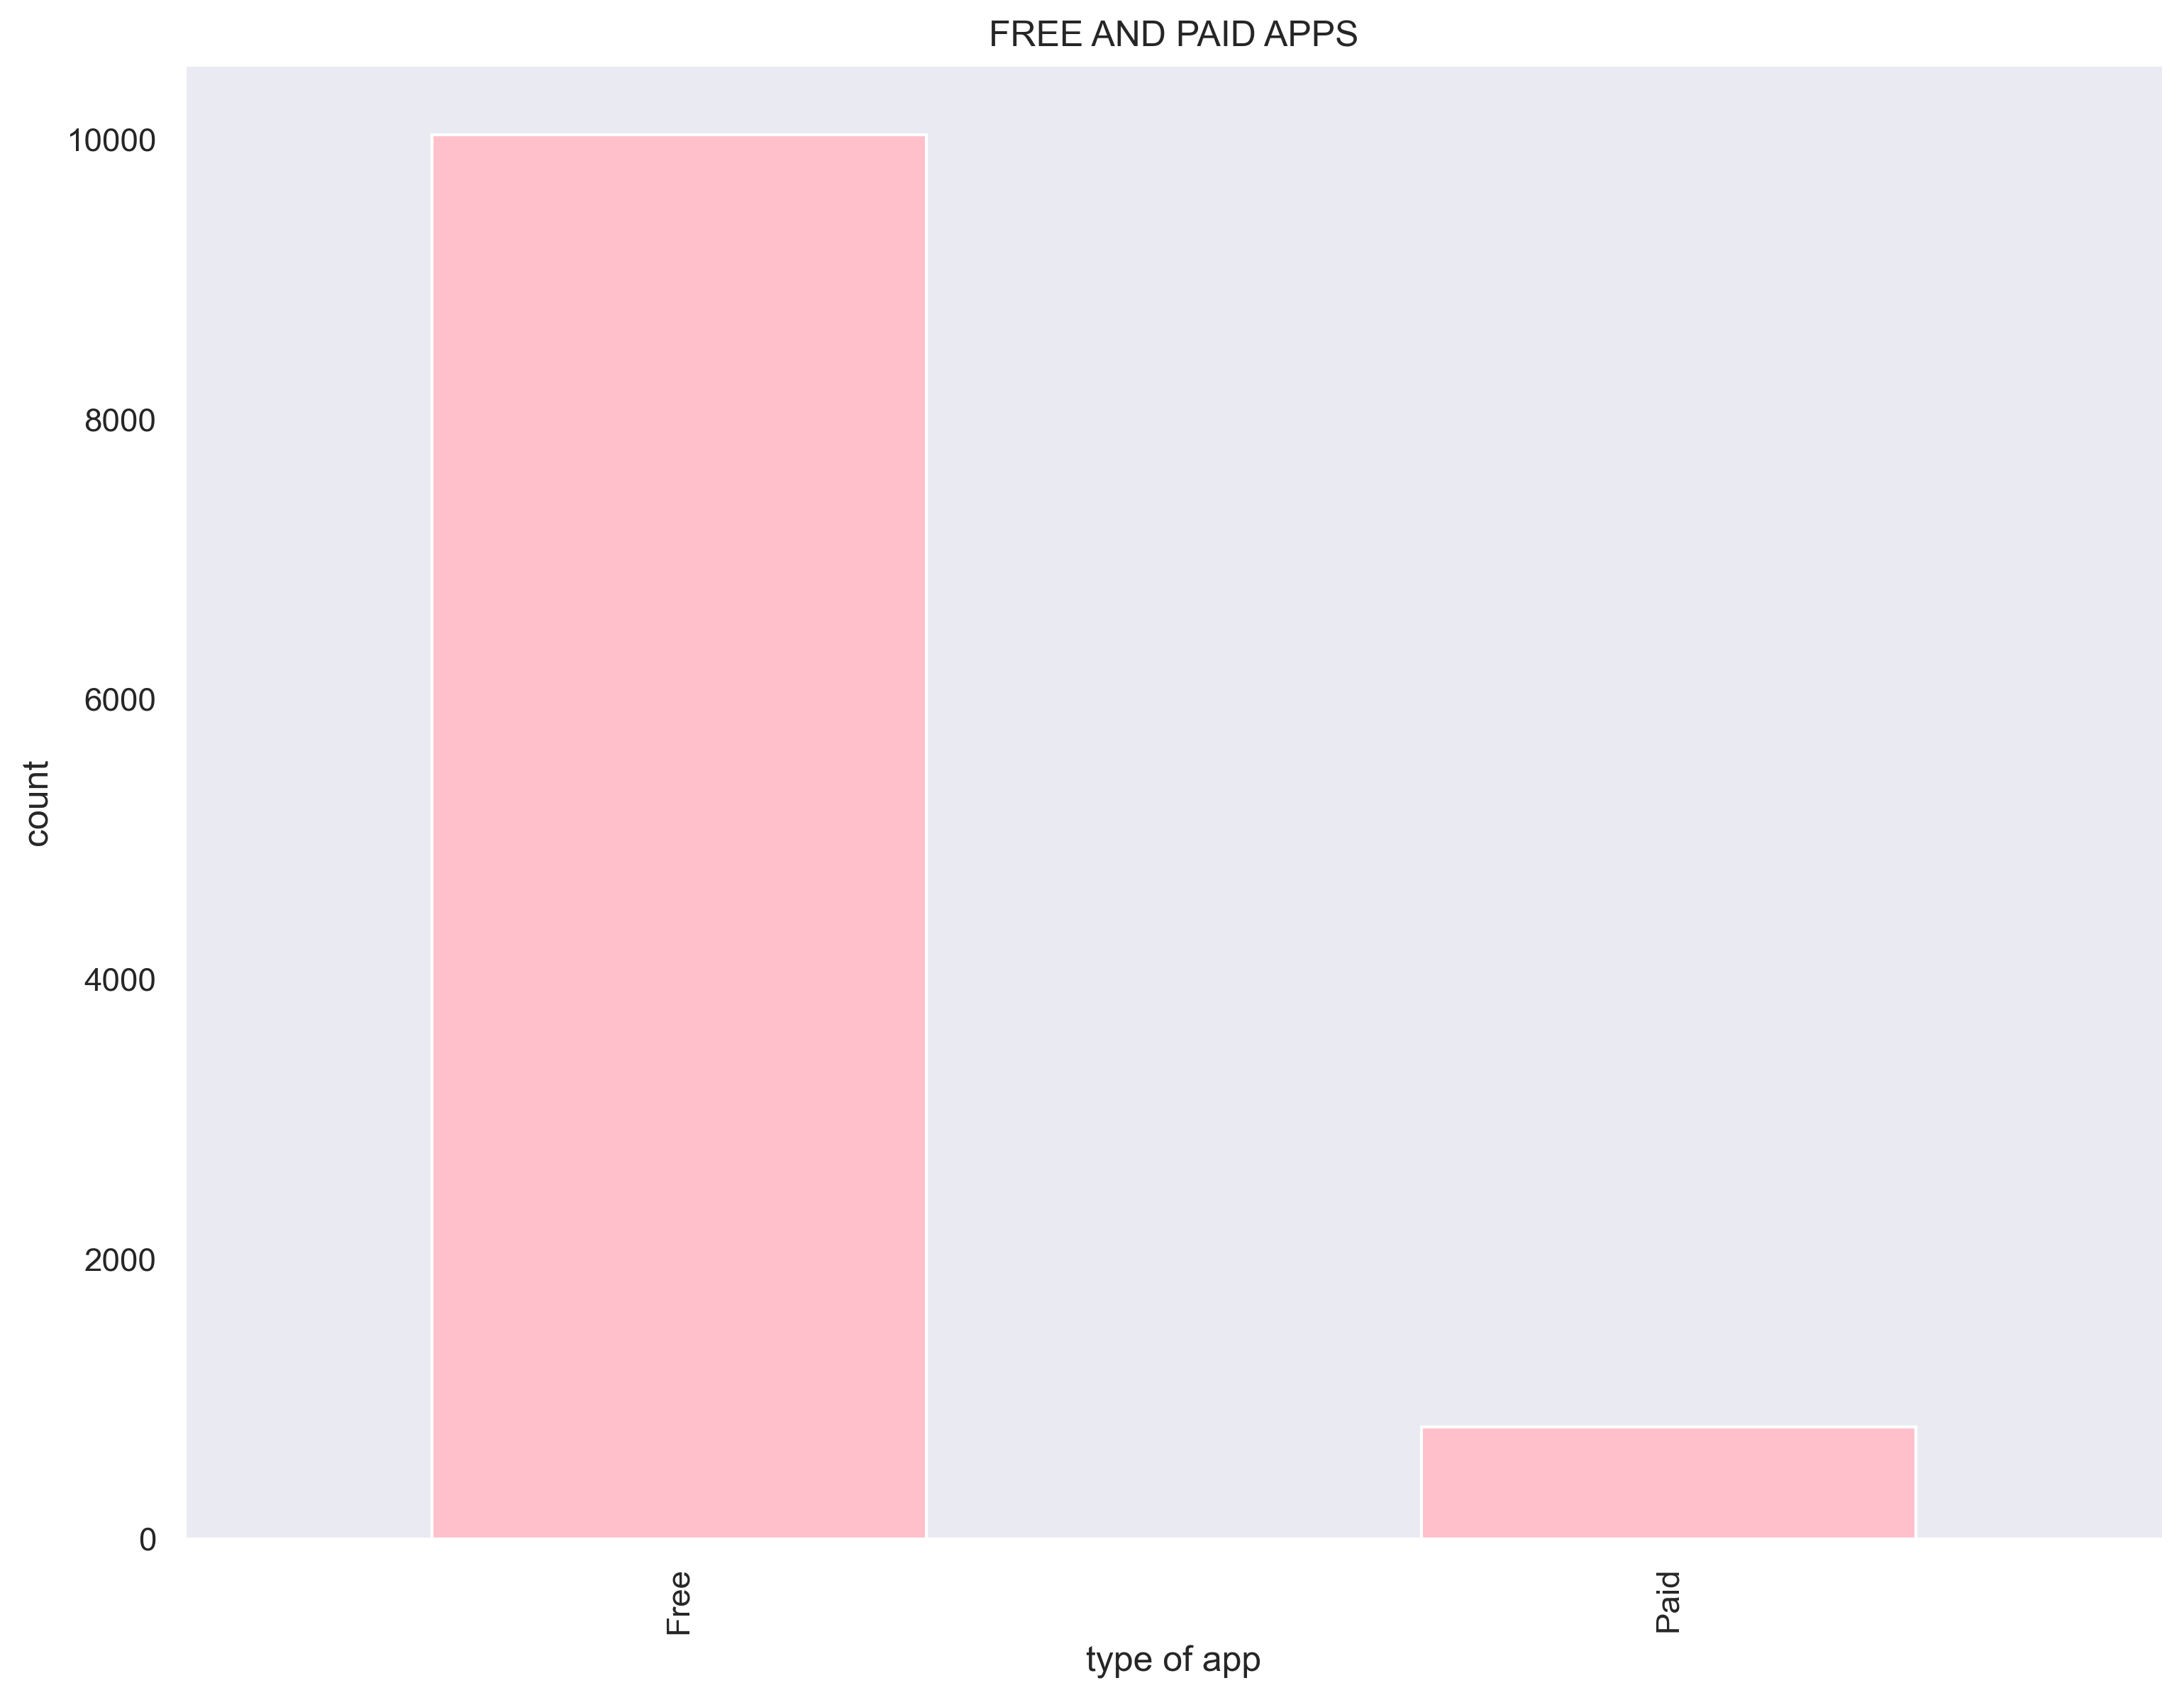

In [76]:
df["Type"].value_counts().plot(kind="bar",color="pink")
plt.title("FREE AND PAID APPS")
plt.xlabel("type of app")
plt.ylabel("count")
plt.grid()
plt.show()

* Free apps are more than Paid apps.

In [77]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

which type of app is rated more?

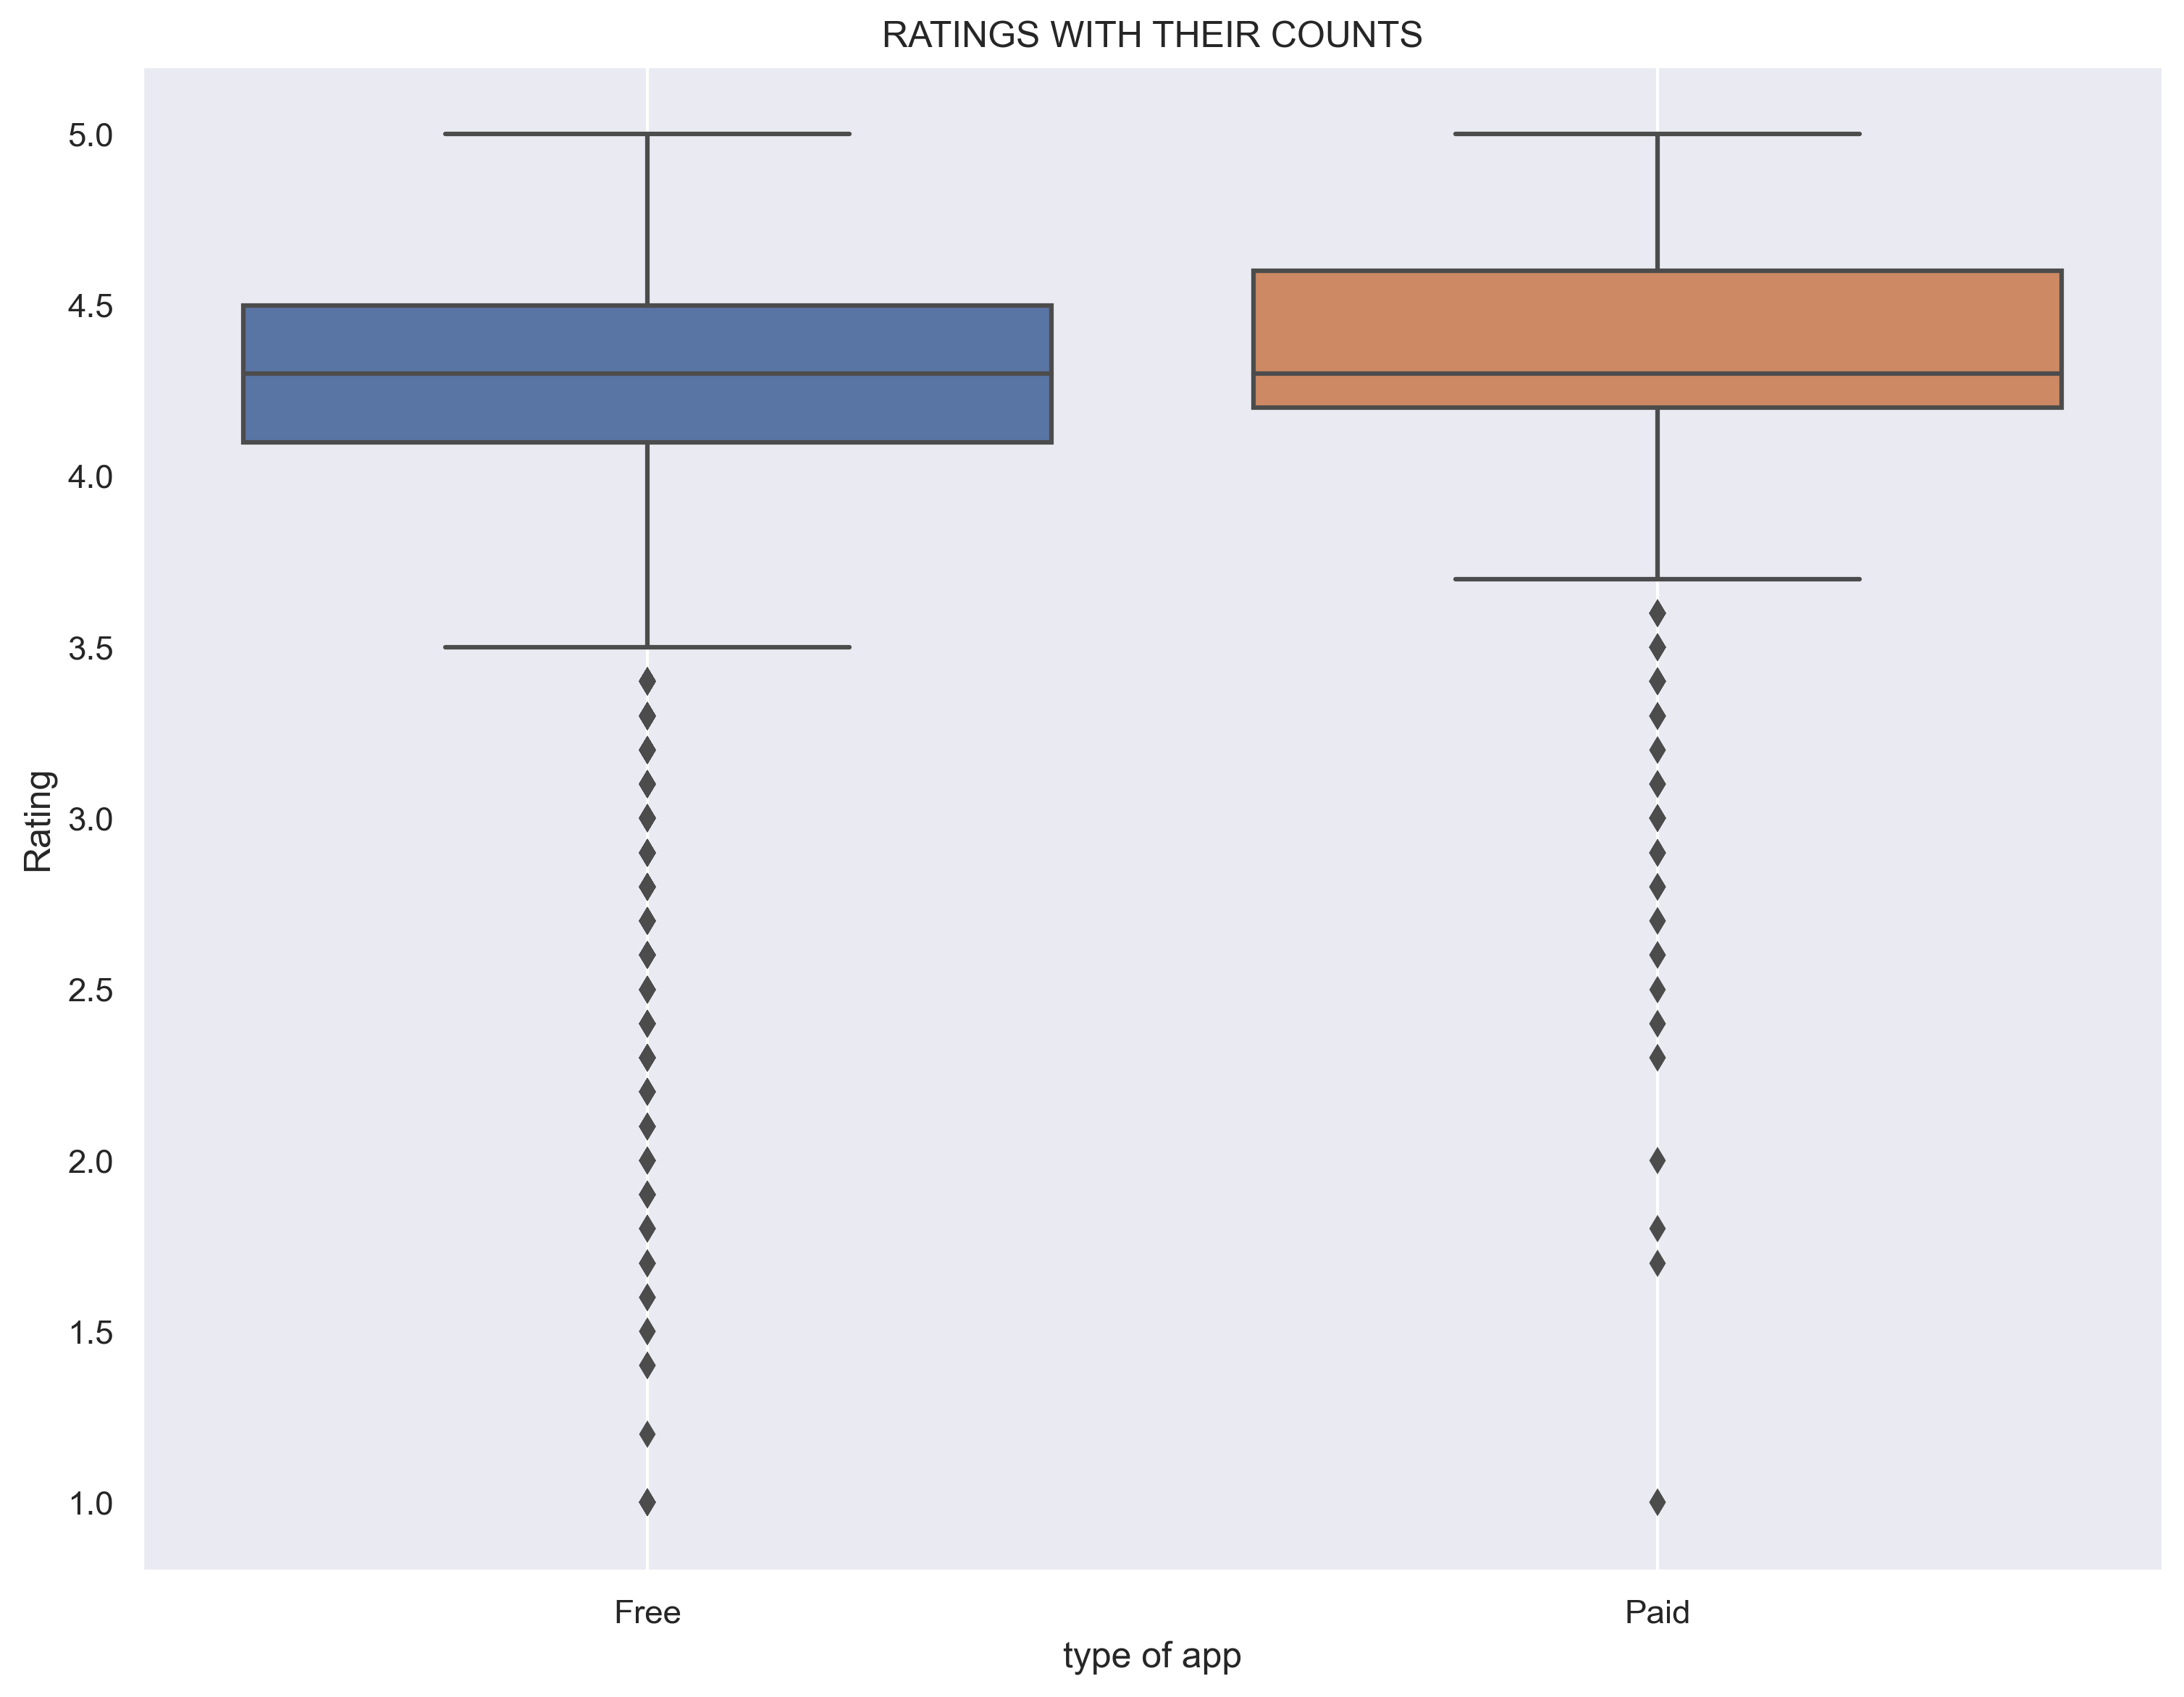

In [79]:
sns.boxplot(x = "Type", y = "Rating", data = df)
plt.title("RATINGS WITH THEIR COUNTS")
plt.xlabel("type of app")
plt.ylabel("Rating")
plt.grid()
plt.show()

- The average rating of paid apps is higher.
- there many outliers too

In [81]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [83]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In which age category most of the apps rated? 

Text(0.5, 1.0, 'CATEGORY CONTENT RATING')

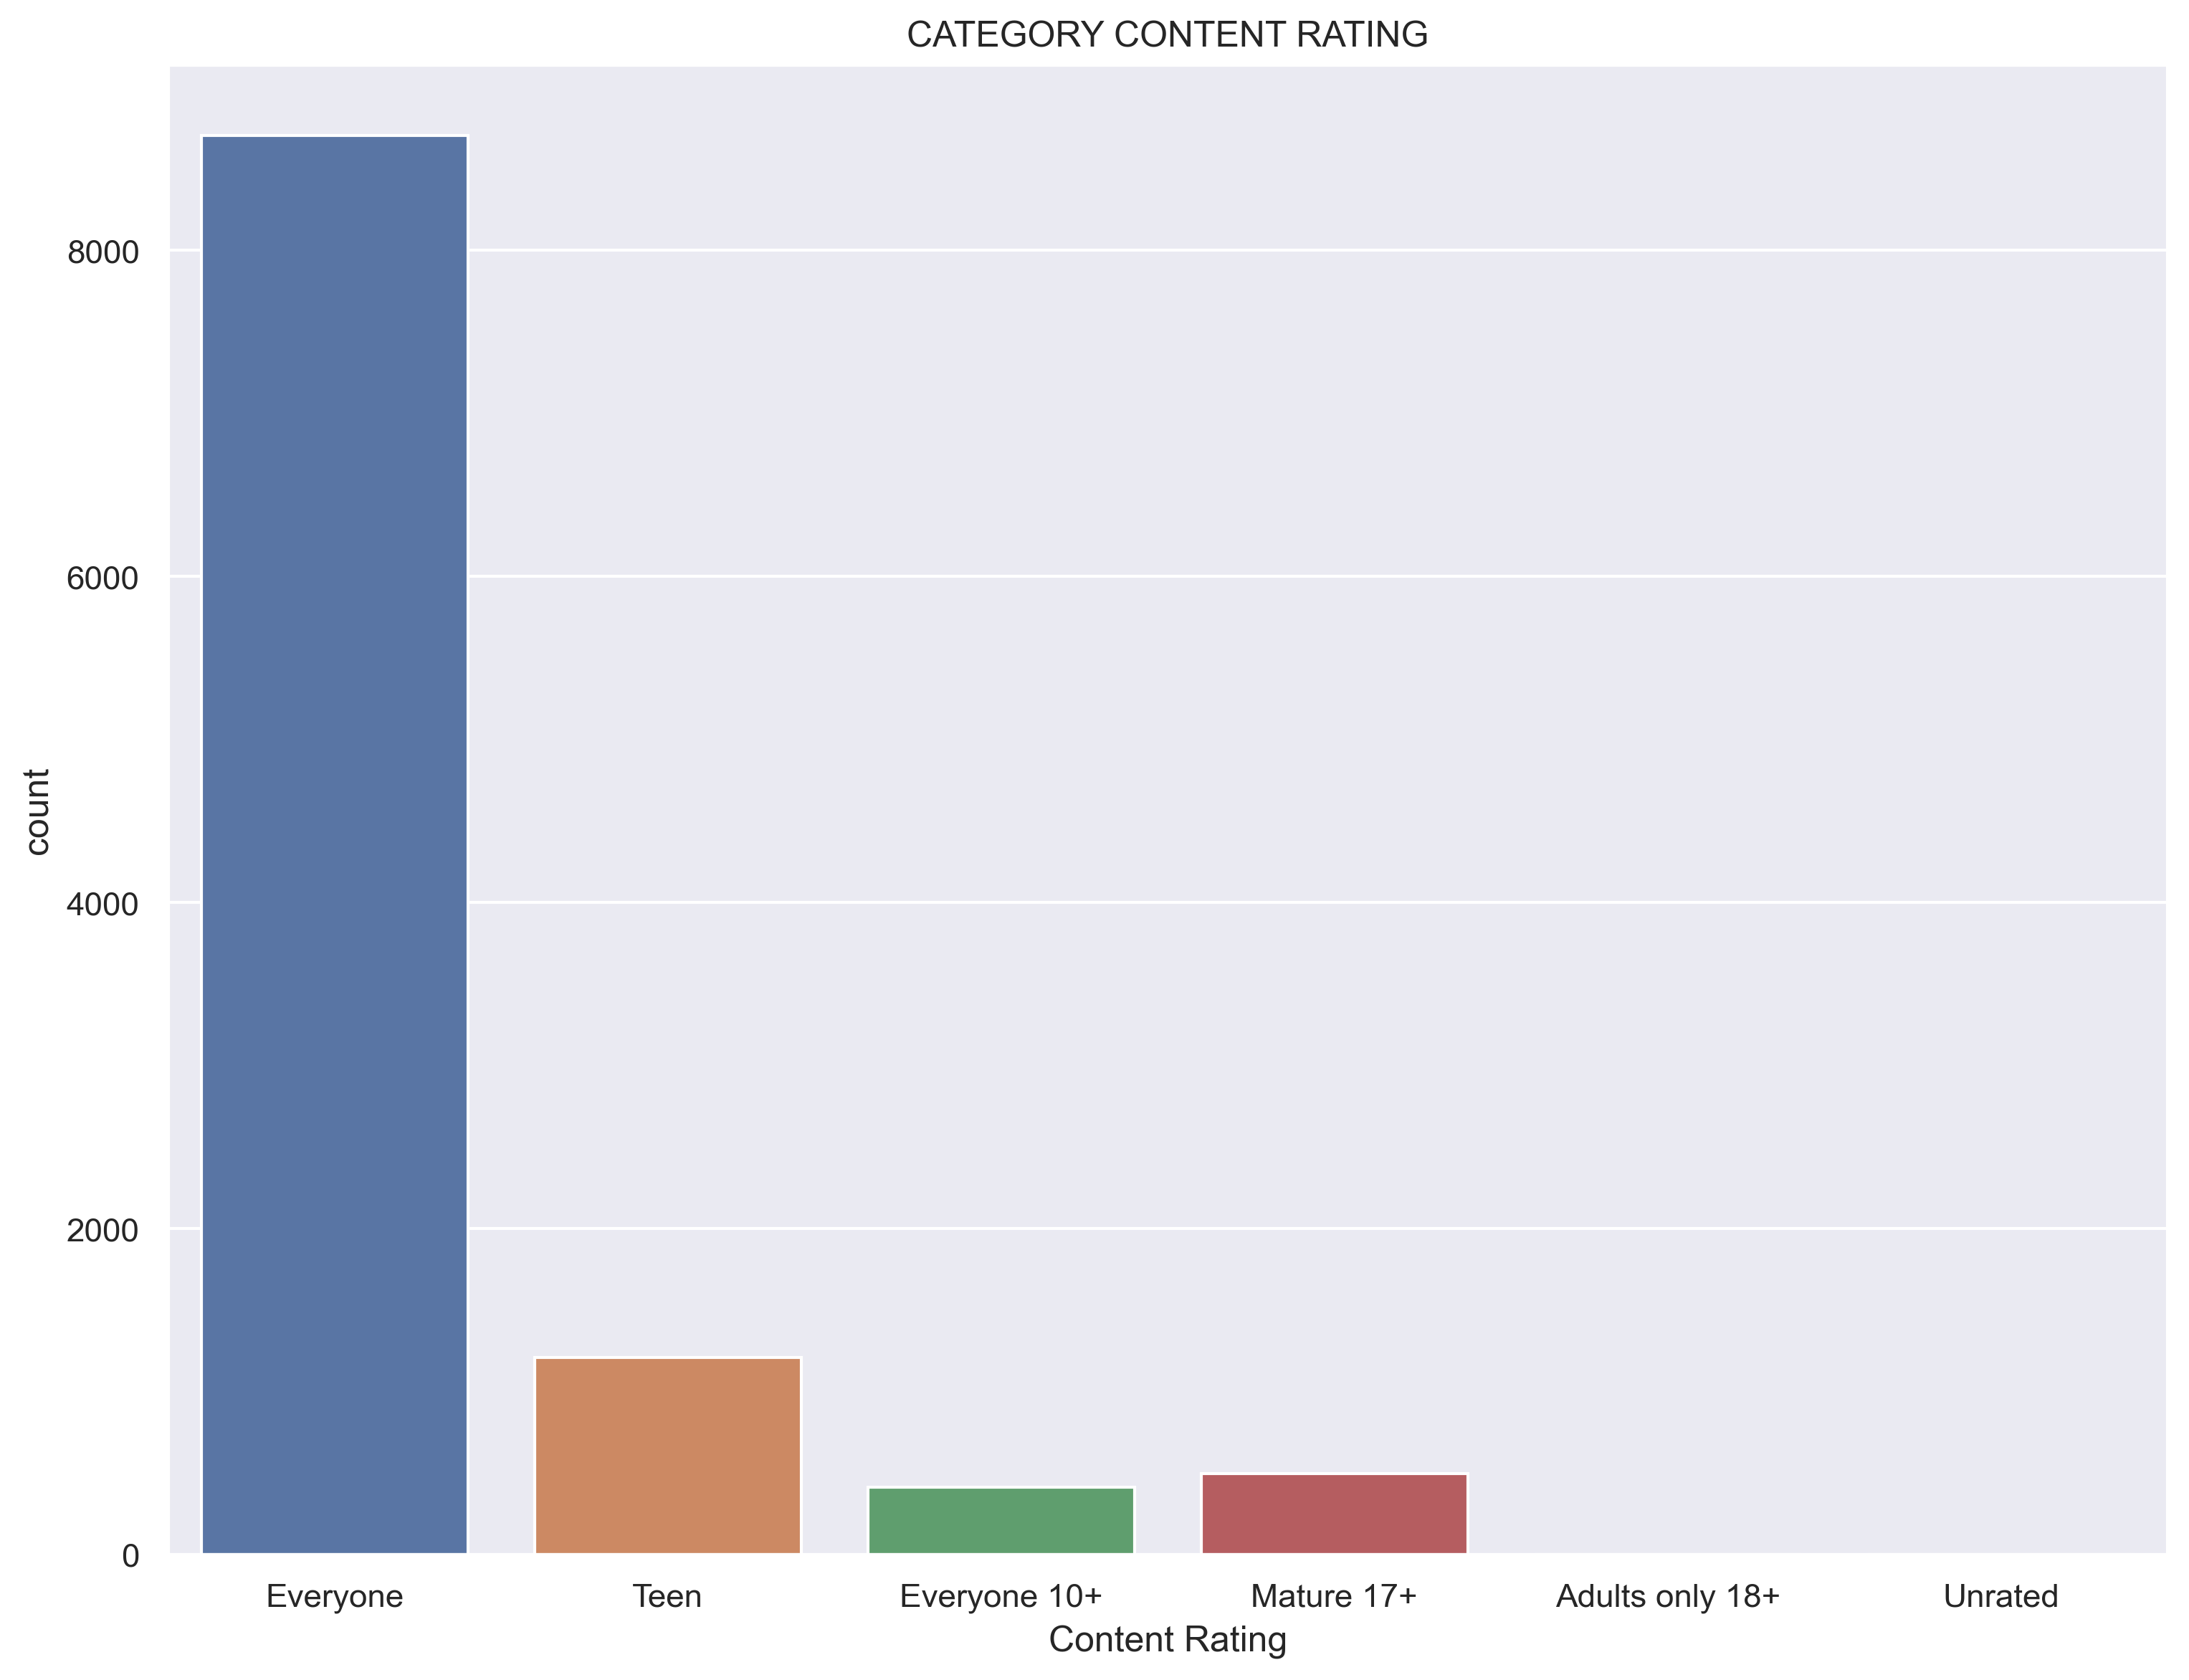

In [86]:
sns.countplot(x = "Content Rating", data = df)
plt.title("CATEGORY CONTENT RATING")

- The most apps are in the Everyone category, then comes Teen.

Text(0.5, 1.0, 'CATEGORY CONTENT RATING')

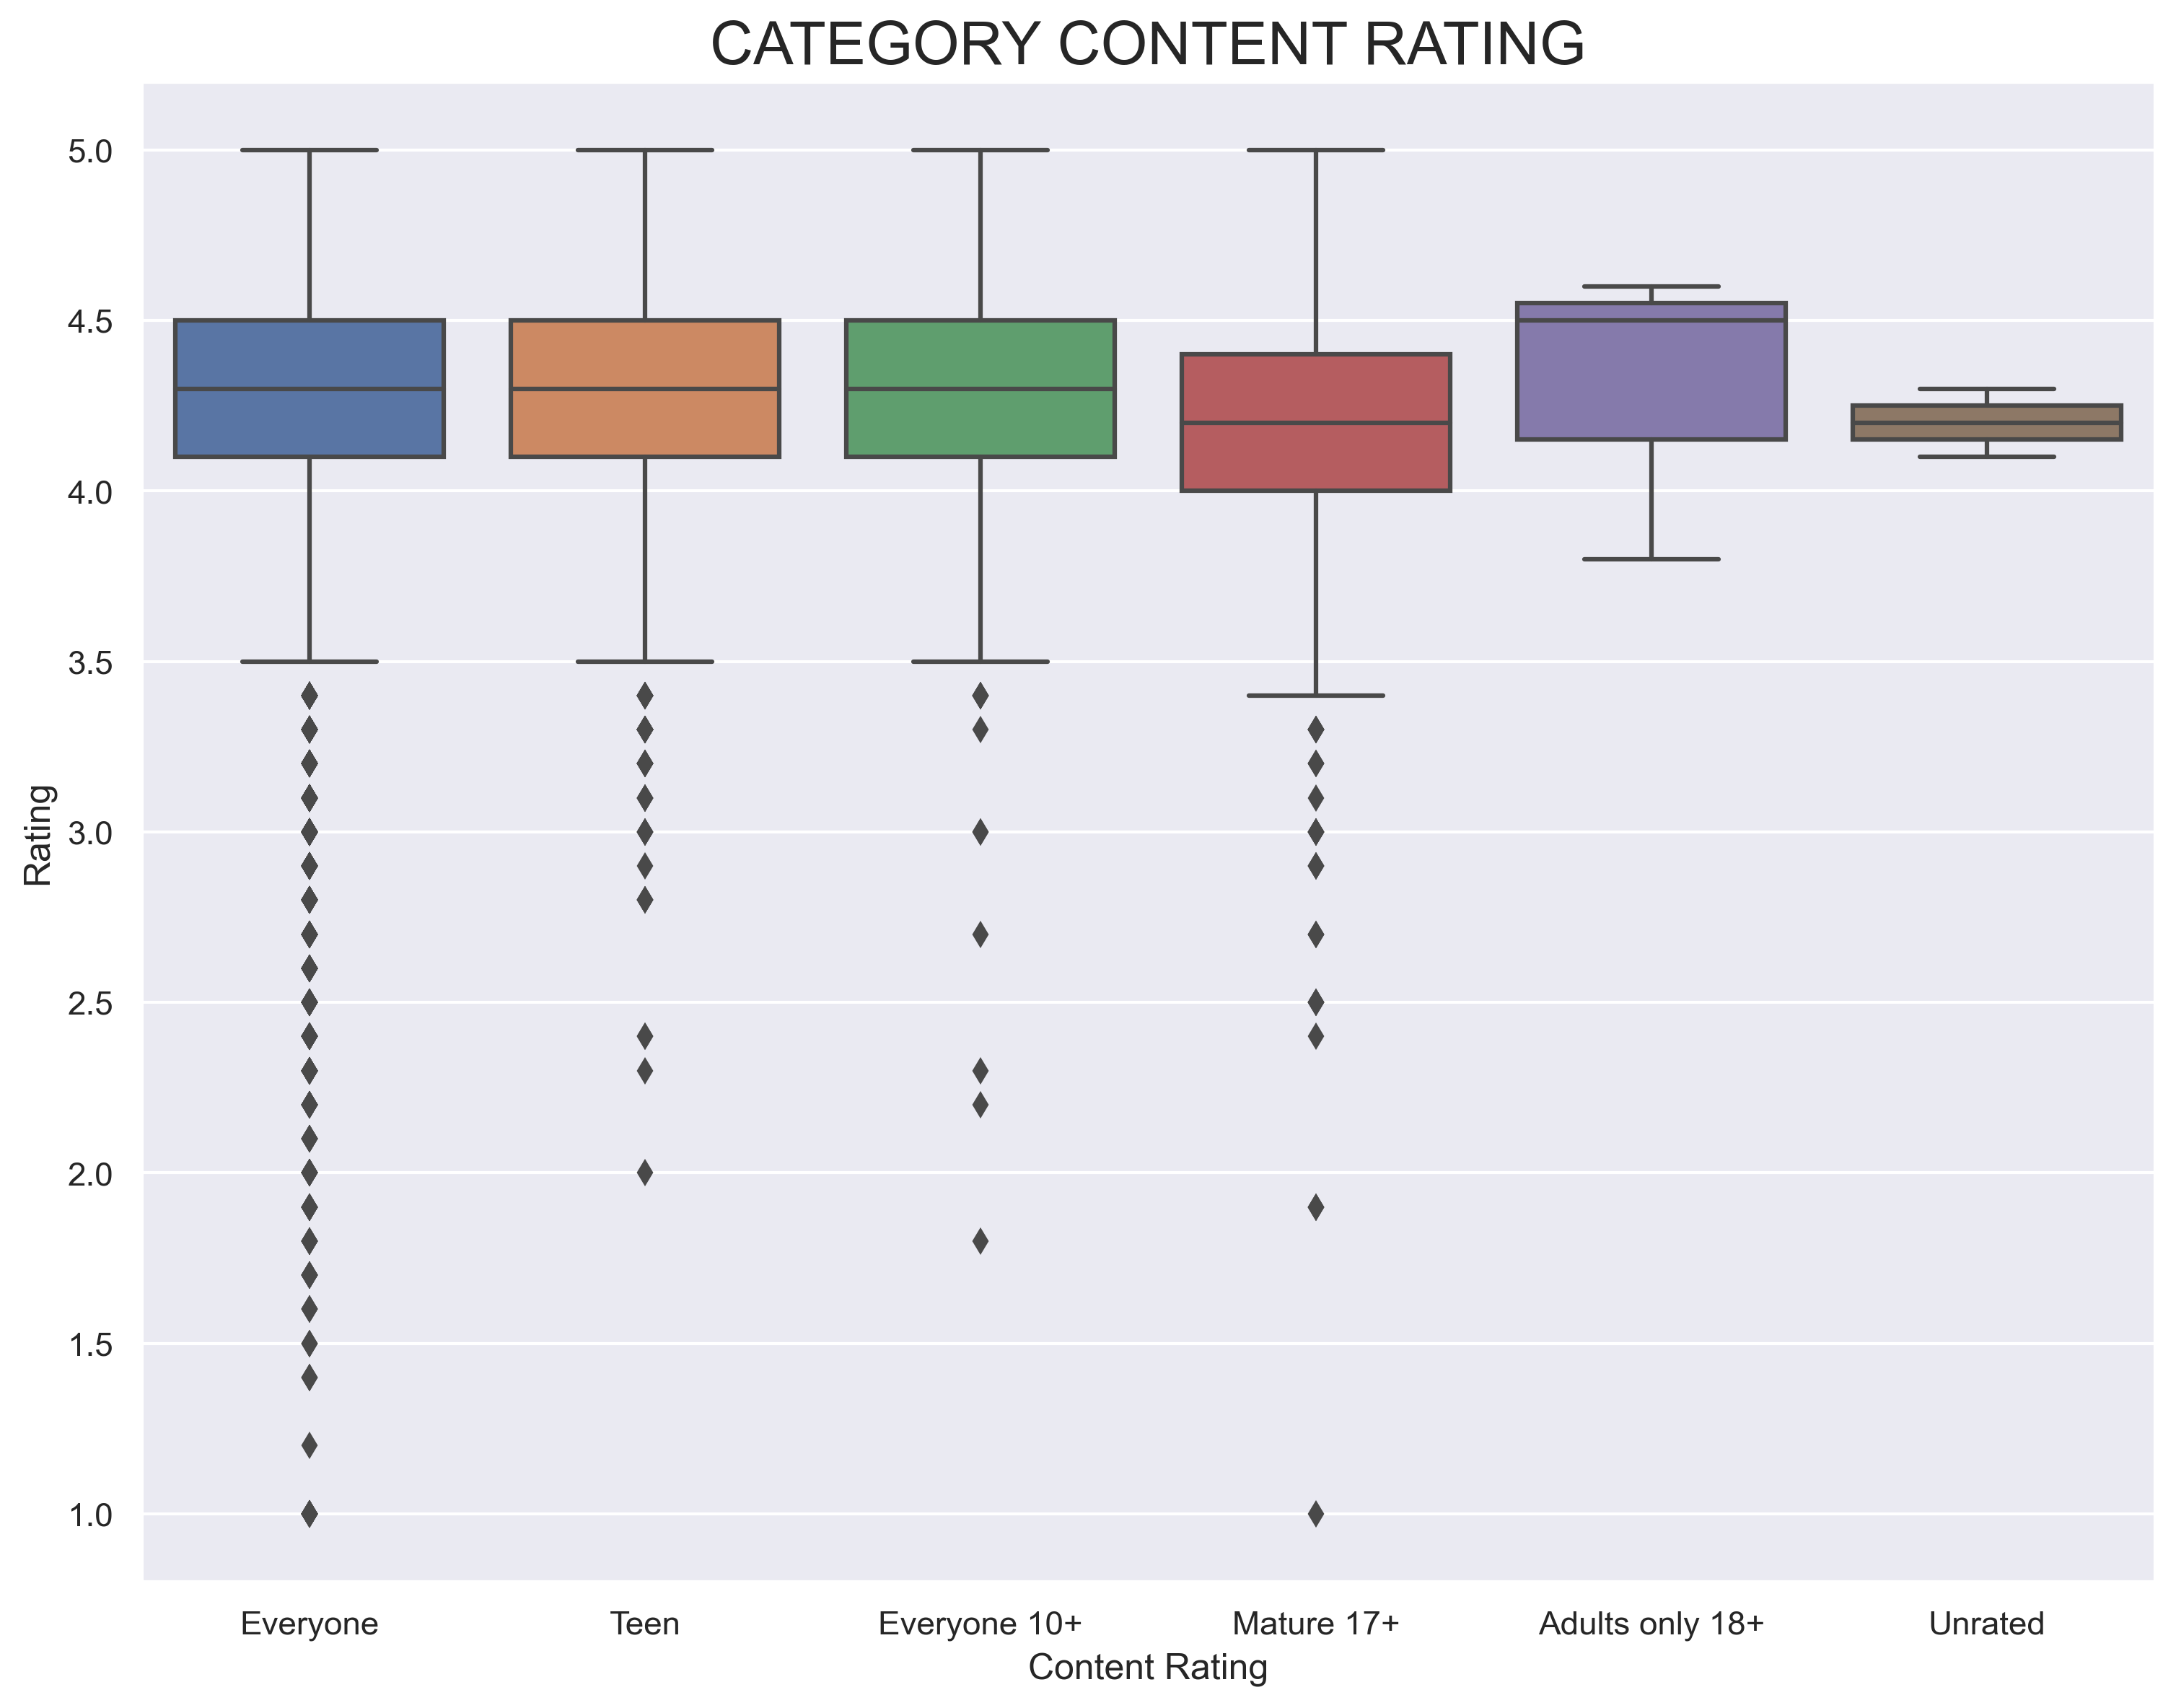

In [88]:
sns.boxplot(x = "Content Rating", y = "Rating", data = df)
plt.title("CATEGORY CONTENT RATING",size=20)

- the ratings are almost the same for Everyone, Teen, Everyone 10+. The Everyone has more outliers than other categories. Mature 17+ has the lowest average. The rating average of the 18+ category is higher than the others.

most applications are in which category?

Text(0.5, 1.0, 'The number of categories')

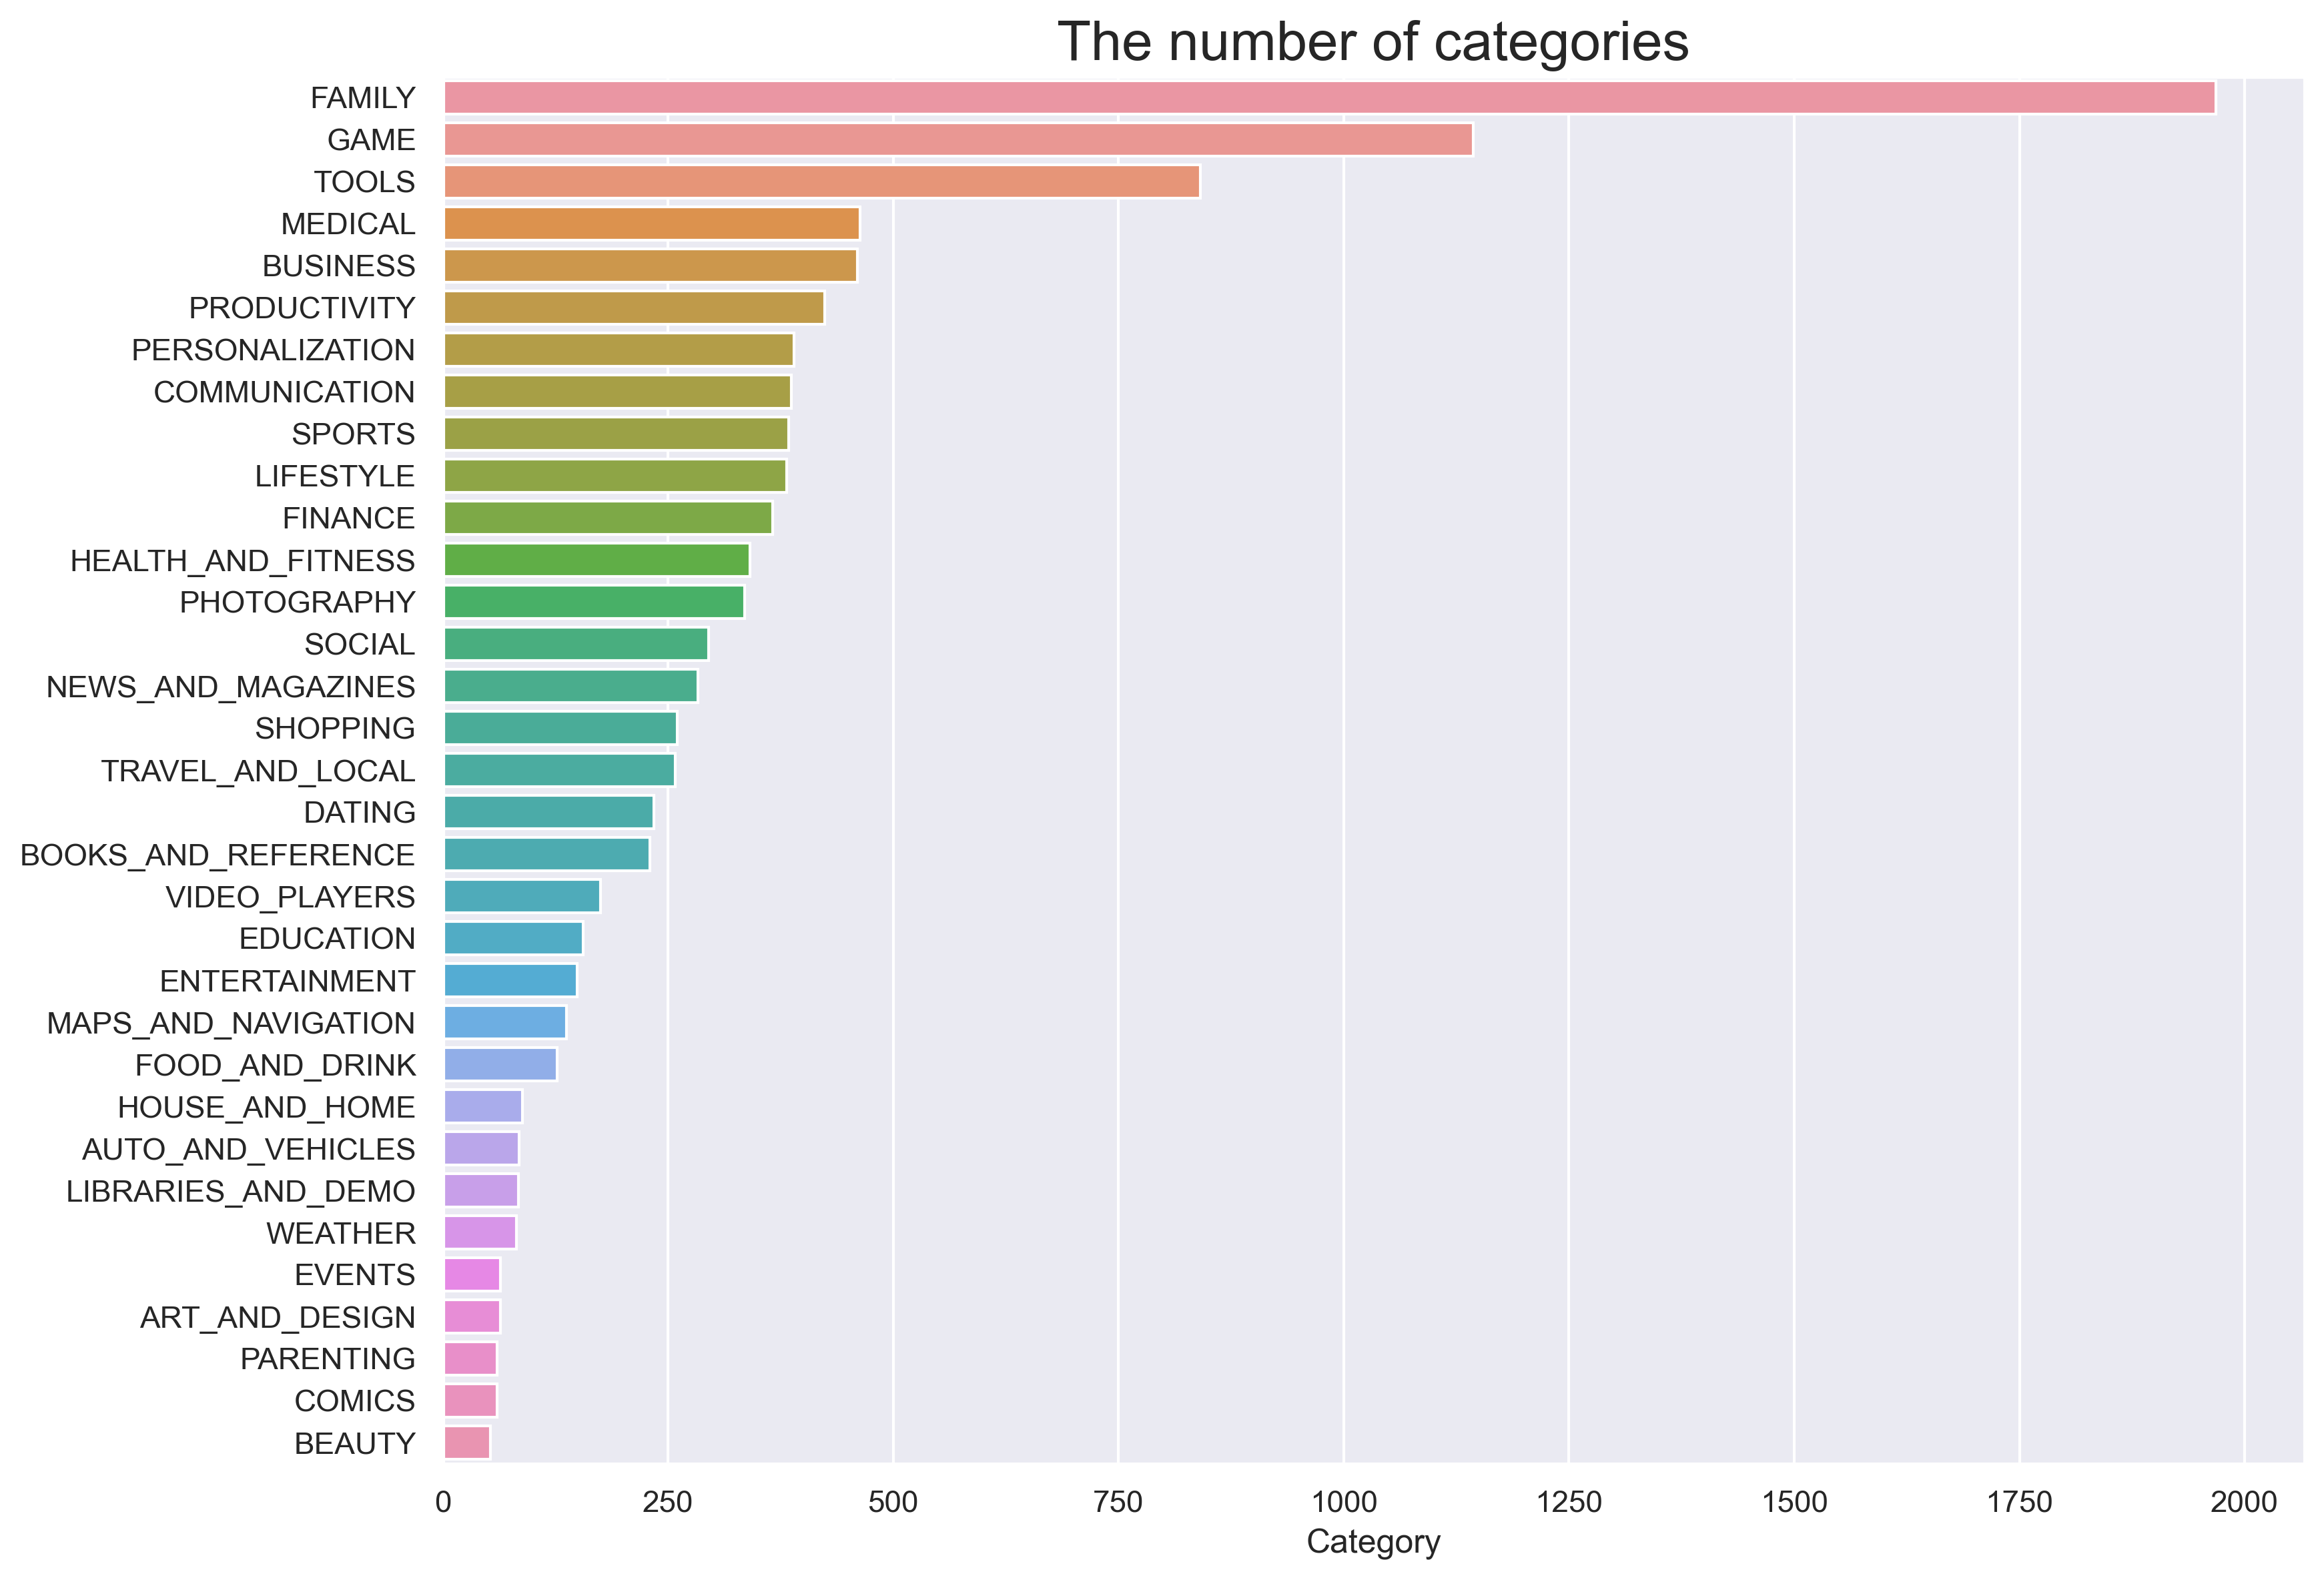

In [91]:
cat_num = df["Category"].value_counts()
sns.barplot(x = cat_num, y = cat_num.index, data = df)
plt.title("The number of categories", size=20)

- The most applications are in the family category, then the game, then tools.

which application is highest paid?

Text(0.5, 1.0, 'Category & Price')

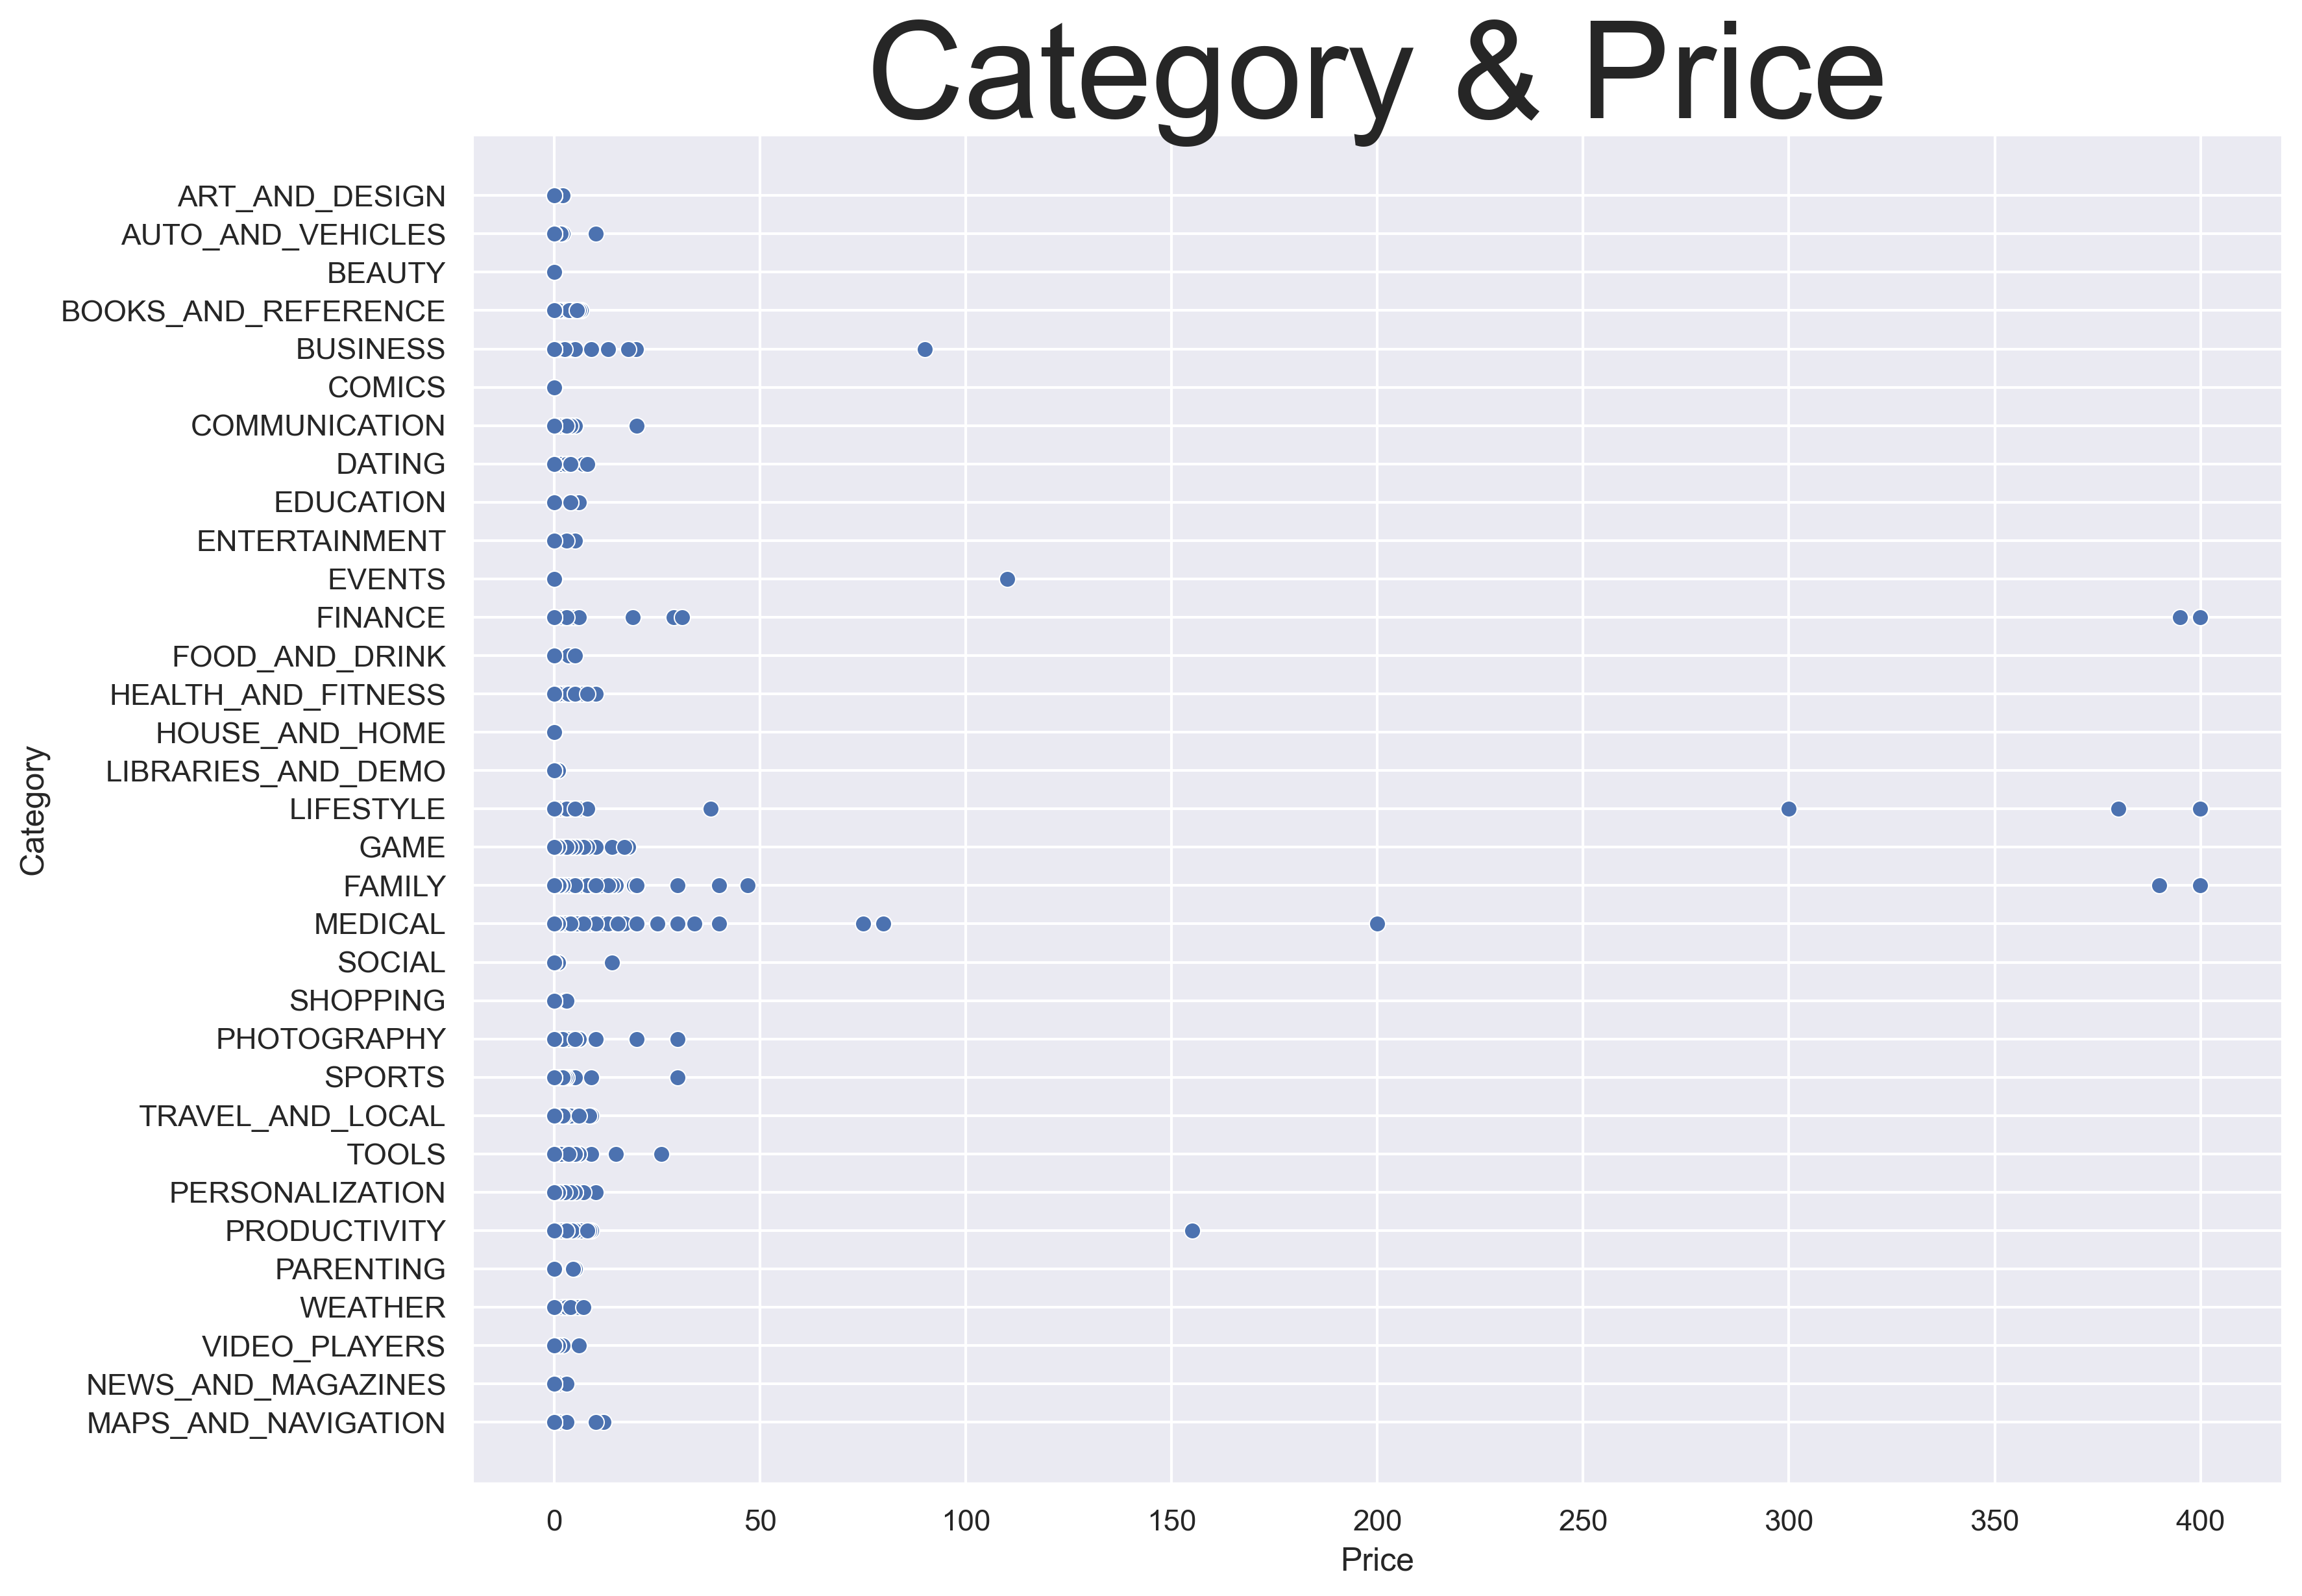

In [95]:
sns.scatterplot(data = df, y = "Category", x = "Price")
plt.title("Category & Price", size=50)

-  the highest paid applications are finance, lifestyle, and family.

###### HEATMAP FOR NUMERICAL COLUMNS

In [98]:
correlation = df.corr()
correlation

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063172,-0.021997,0.045495,-0.019330
Reviews,0.063172,1.000000,0.003765,0.643112,-0.009674
Size,-0.021997,0.003765,1.000000,-0.012574,0.016526
Installs,0.045495,0.643112,-0.012574,1.000000,-0.011698
Price,-0.019330,-0.009674,0.016526,-0.011698,1.000000


Text(0.5, 1.0, 'HEATMAP FOR NUMERICAL VALUES')

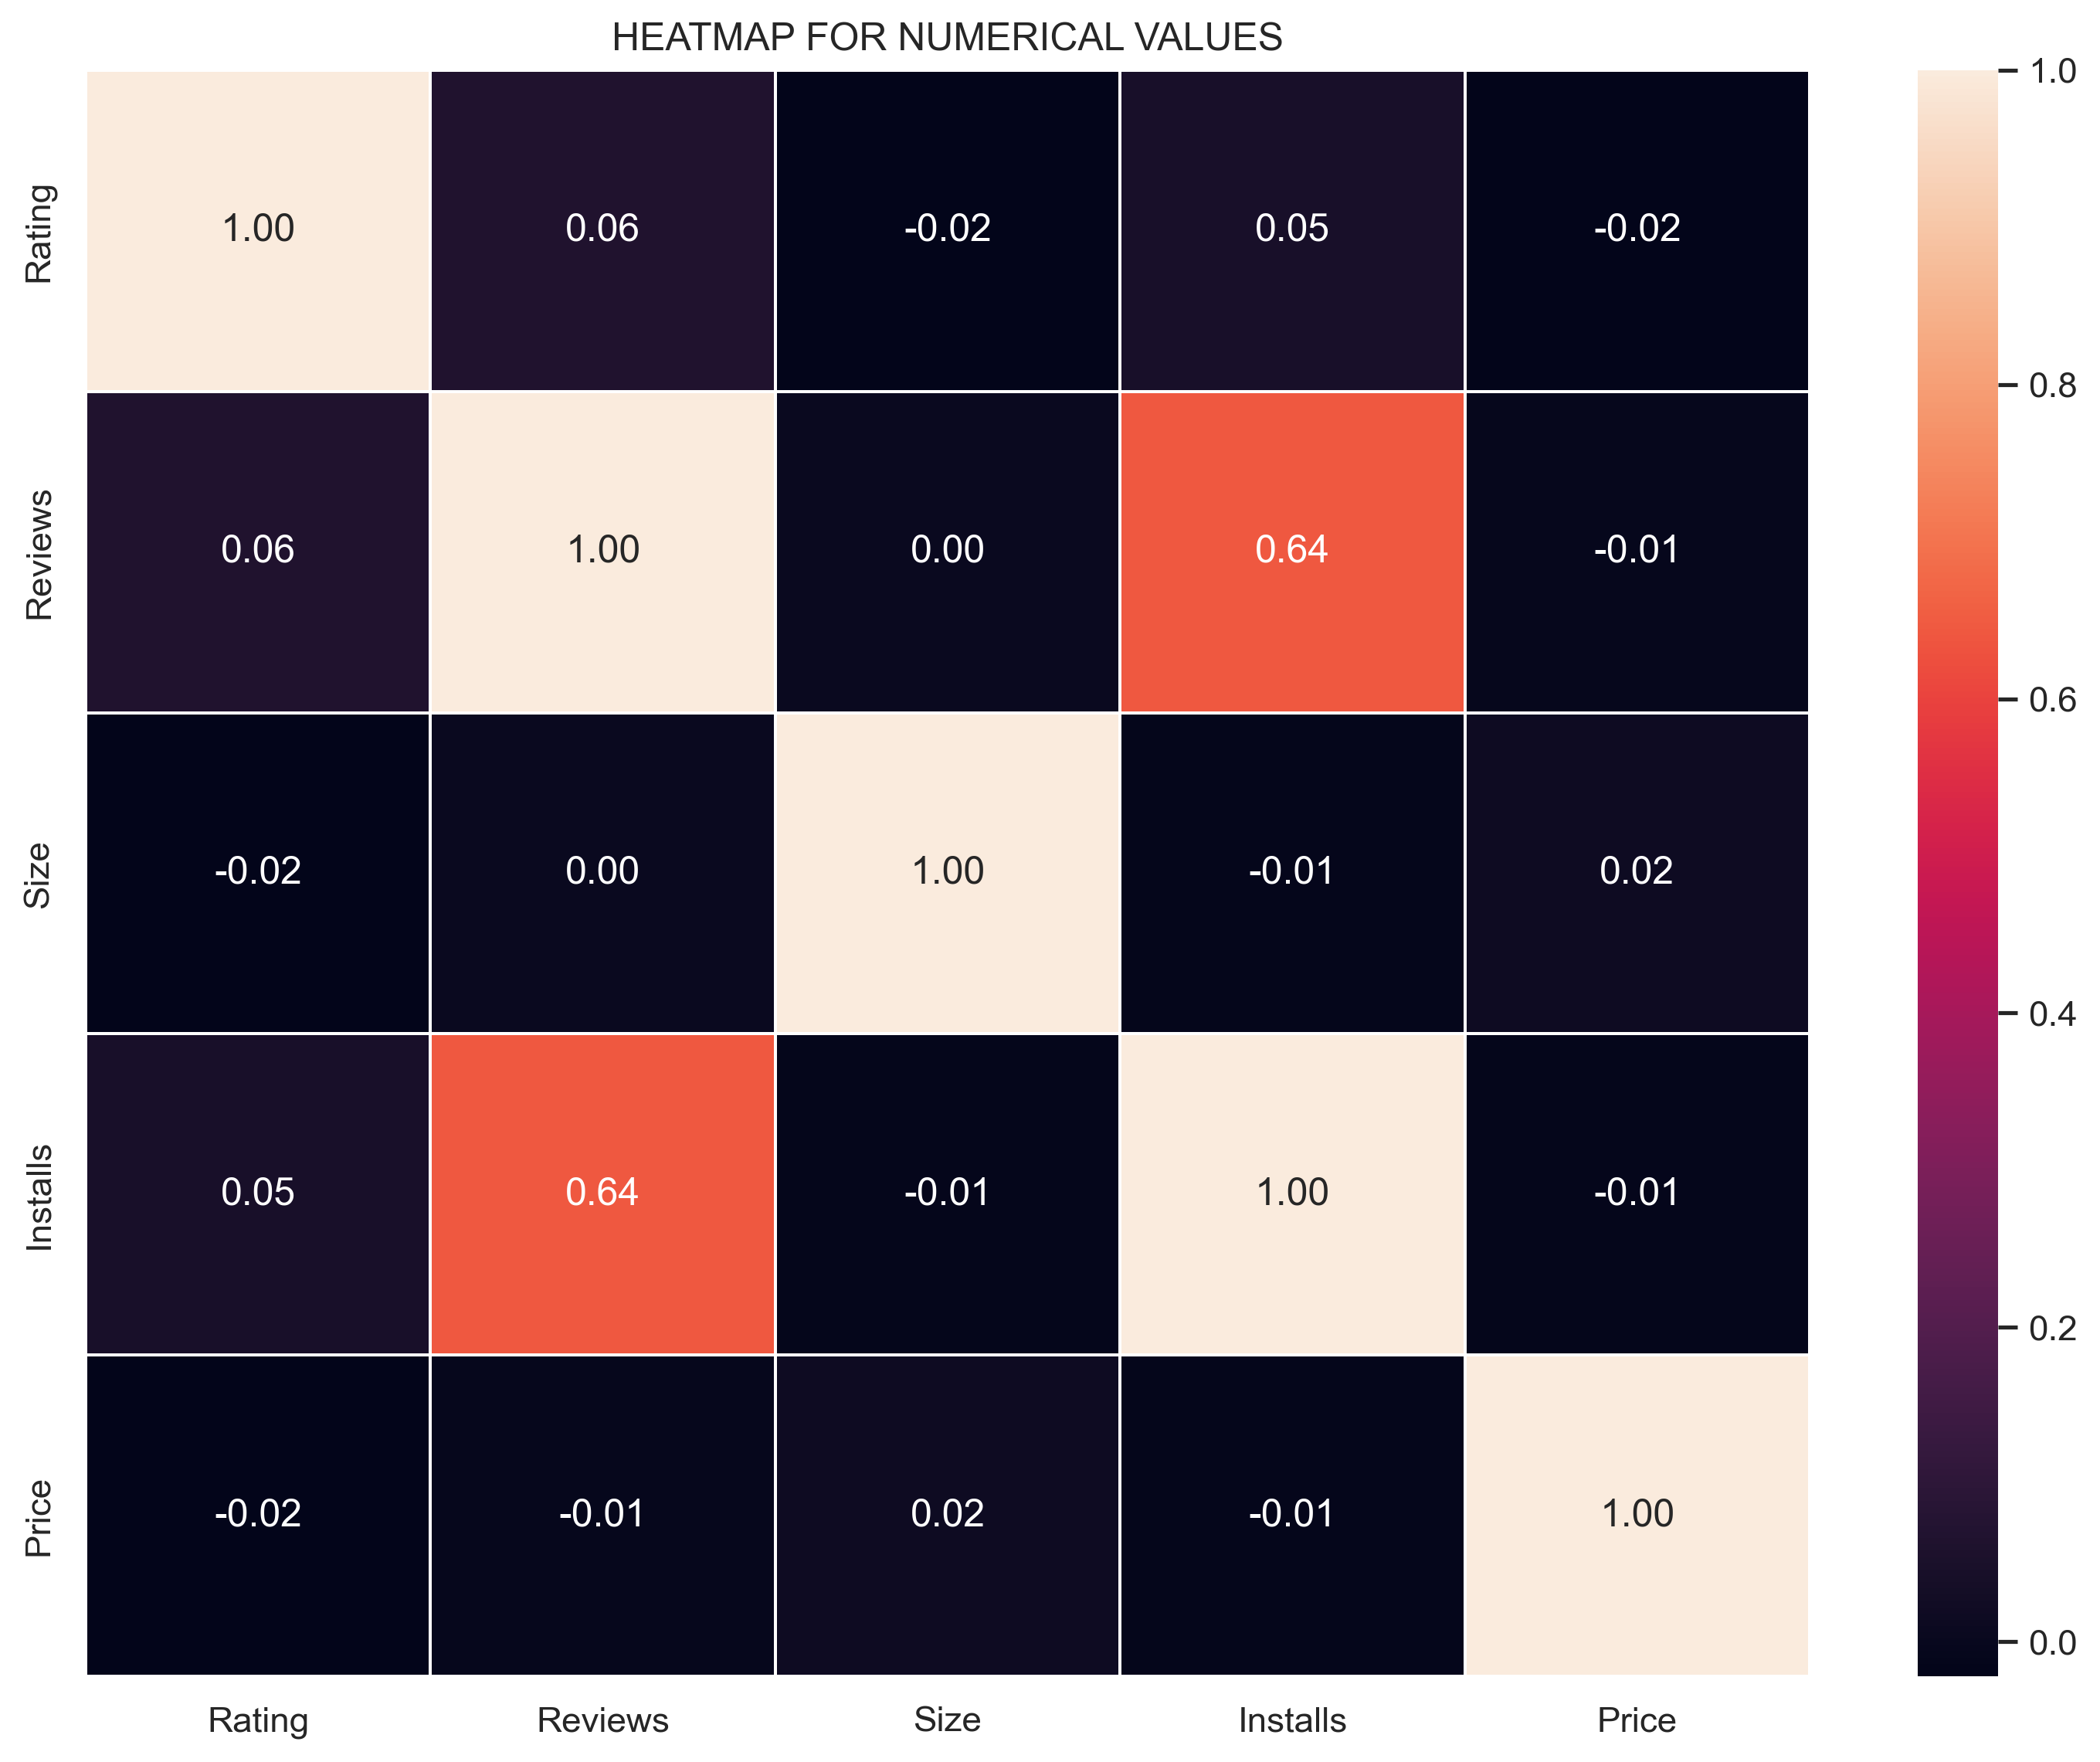

In [99]:
sns.heatmap(correlation,annot=True,linewidths=.5, fmt=".2f")
plt.title("HEATMAP FOR NUMERICAL VALUES")

- The relationship between the Installs and Reviews columns is 0.64.

###### HISTOGRAM WITH THE kde FOR THE RATING COLUMN

Text(0.5, 1.0, ' HISTOGRAM WITH THE kde FOR THE RATING COLUMN ')

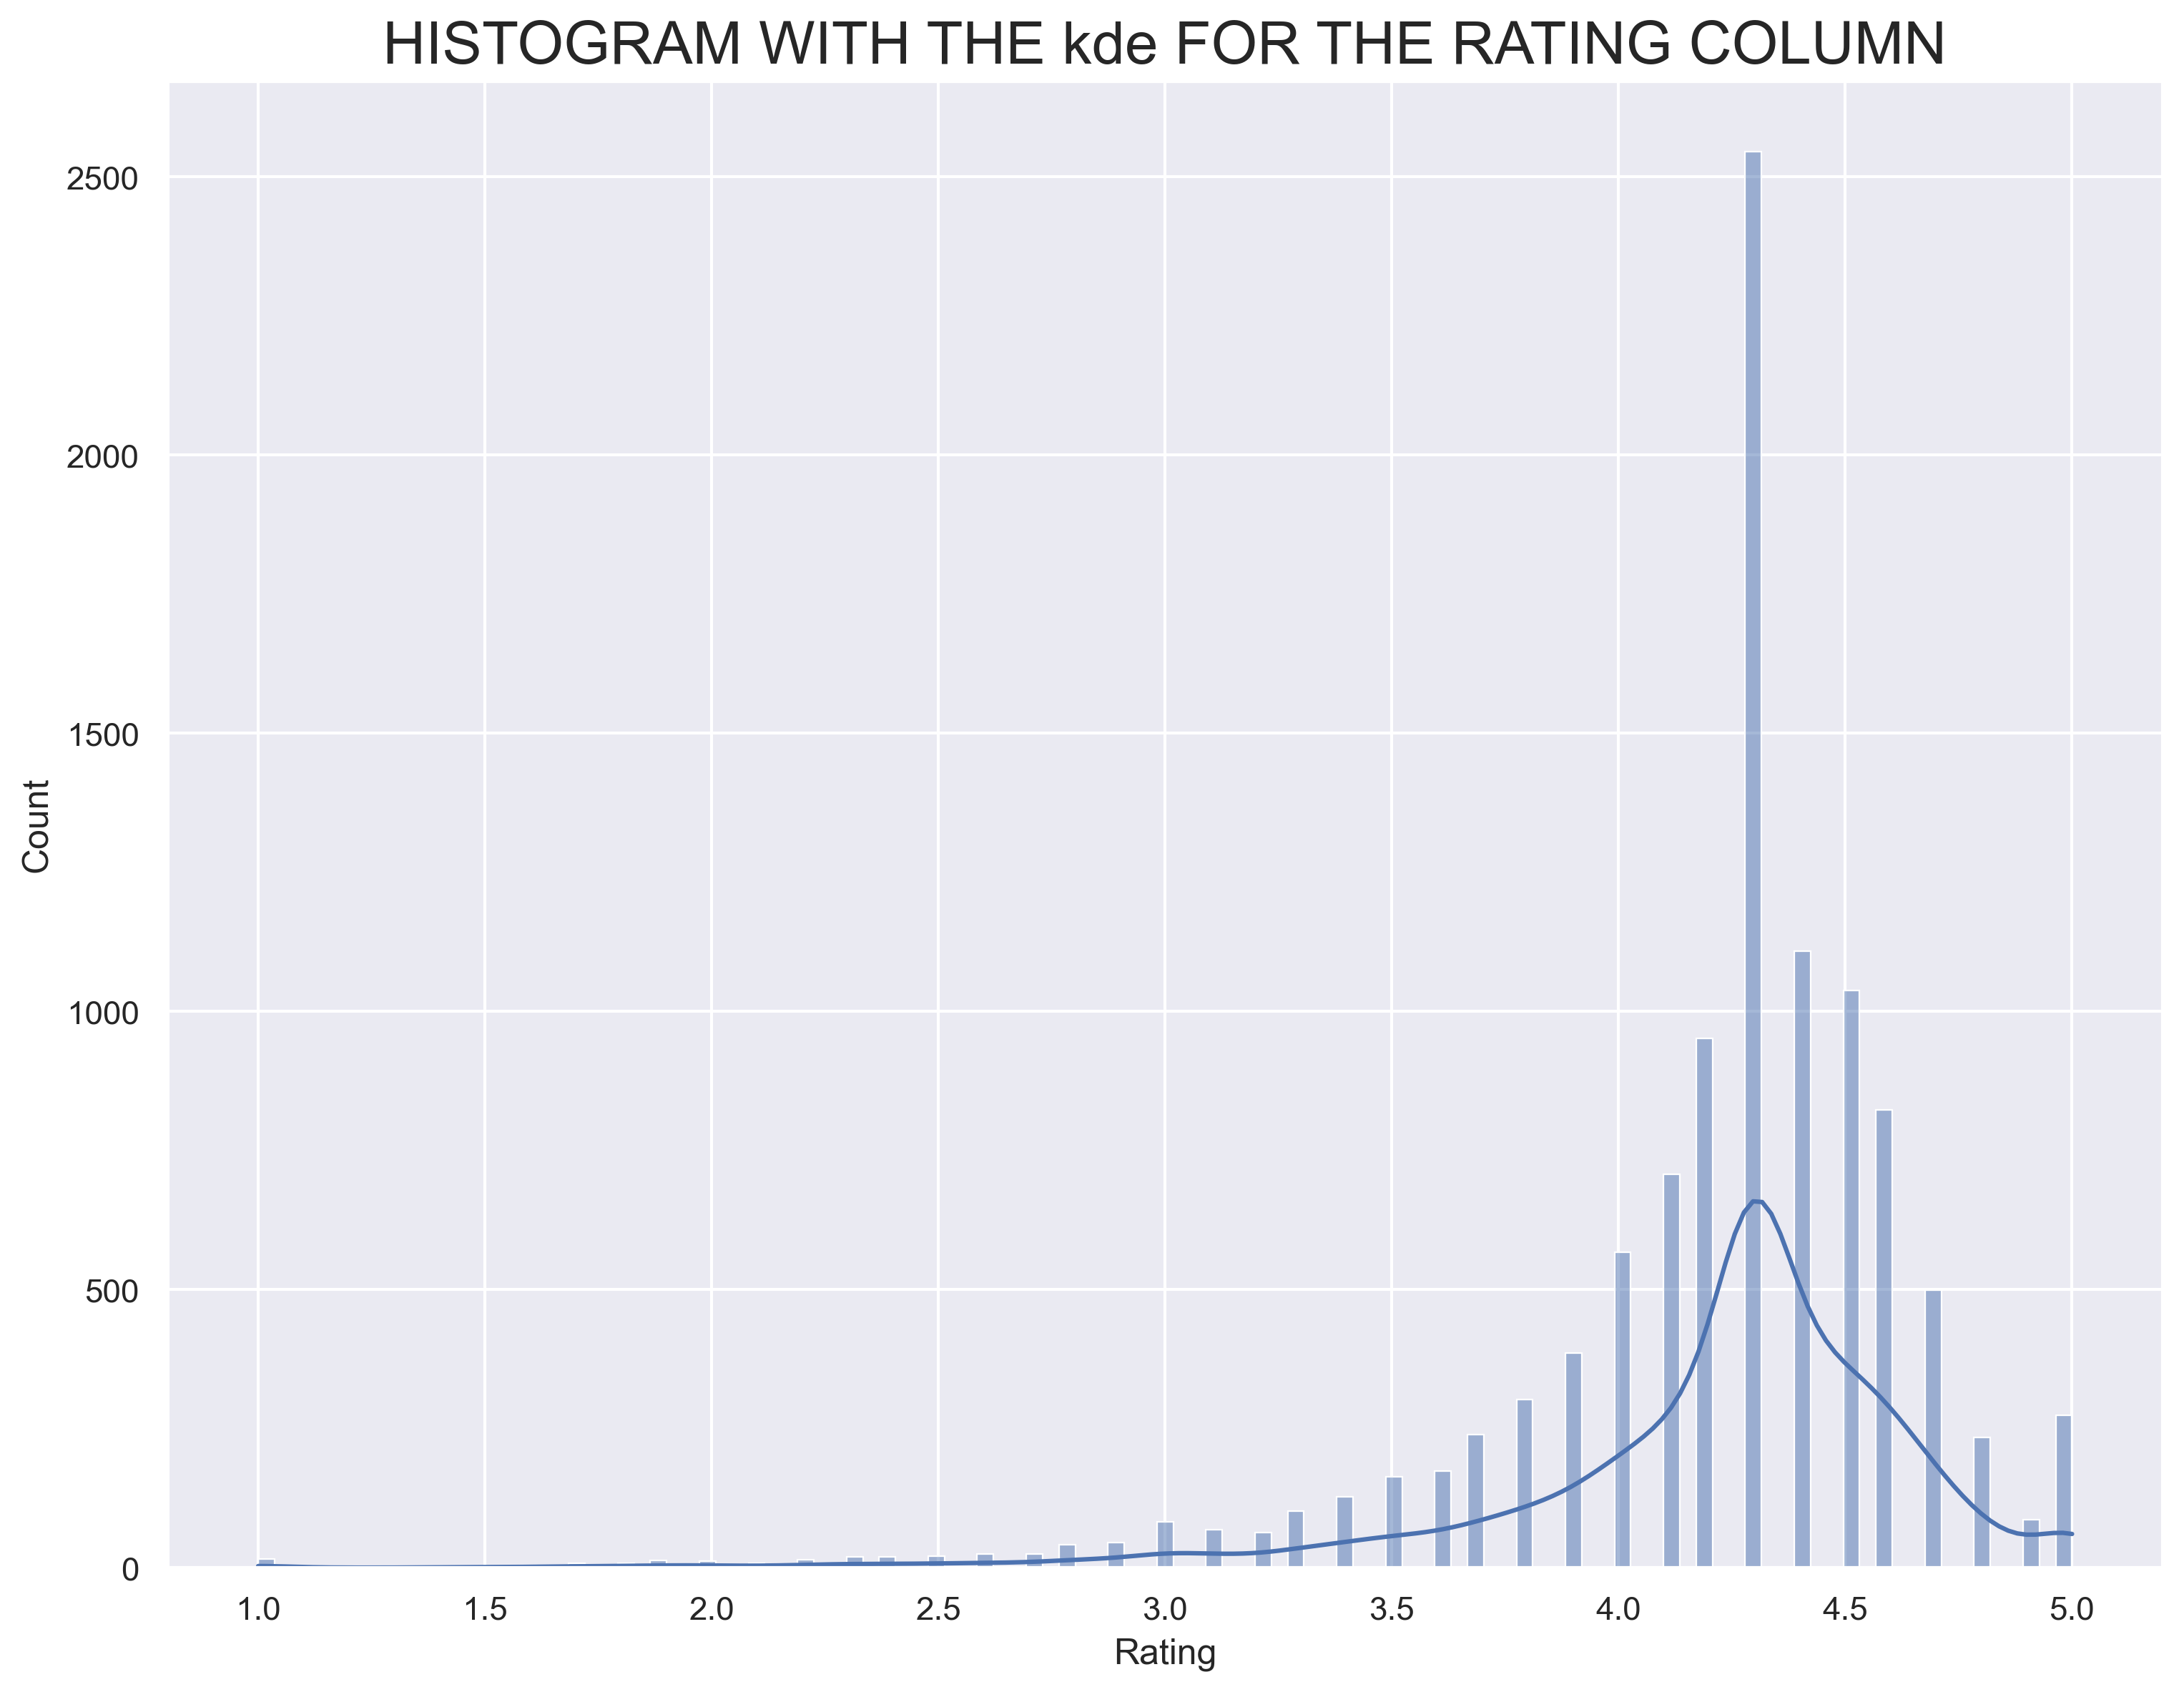

In [100]:
sns.histplot(df["Rating"], kde = True)
plt.title(" HISTOGRAM WITH THE kde FOR THE RATING COLUMN ", size=20)

- The most rating values are distributed around 4.3.

**CONCLUSION**
- Free apps are more than Paid apps.
- The average rating of paid apps is higher.
- The most apps are in the Everyone category, then comes Teen.
- The ratings are almost the same for Everyone, Teen, Everyone 10+. The   Everyone has more outliers than other categories. Mature 17+ has the lowest average. The rating average of the 18+ category is higher than the others.
- The most applications are in the family category, then the game, then tools.
- The highest paid applications are finance, lifestyle, and family.
- The relationship between the Installs and Reviews columns is 0.64.
- The most rating values are distributed around 4.3.

